# Visualisering inom pythonstacken
Visualiseringar är ett område som traditionellt har varit sämre på python jämfört med R men på senare år har det dykt upp flera bra visualiseringspaket som minskat R's försprång.

Grunden till i princip all visualisering inom Python heter `Matplotlib` som är ett otroligt kraftfullt bibliotek men tyvärr inte så snyggt och rätt komplicerat out-of-the-box. Ett mycket bra bibliotek som åtgärdar många av dessa brister är `Seaborn` som har en mängd paketerade visualiseringar.

Vi börjar med att importera de bibliotek vi kommer att jobba med så här.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

För att vi ska kunna visa visualiseringar i vår notebook behöver vi också sätta följande parameter.

In [2]:
%matplotlib inline

# om vi får dålig upplösning på våra skärmar kan även parametern nedan sättas
%config InlineBackend.figure_format = 'retina'

# denna parameter kan sättas för att styra storleken på visualiseringarna
sns.set(rc={"figure.figsize": (10, 6)})

Vi börjar med att importera datasetet `iris`.

In [3]:
iris = pd.read_csv('./assets/data/iris.csv', sep=';')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualiseringar inbyggda i Pandas
Pandas har några inbyggda sätt att arbeta med visualisering ovanpå matplotlib. Dessa funktioner är ganska grundläggande och existerar nog mest för att vara ett smidigt sätt att arbeta med visualiseringar under databearbetningsfasen.

#### scatter plots

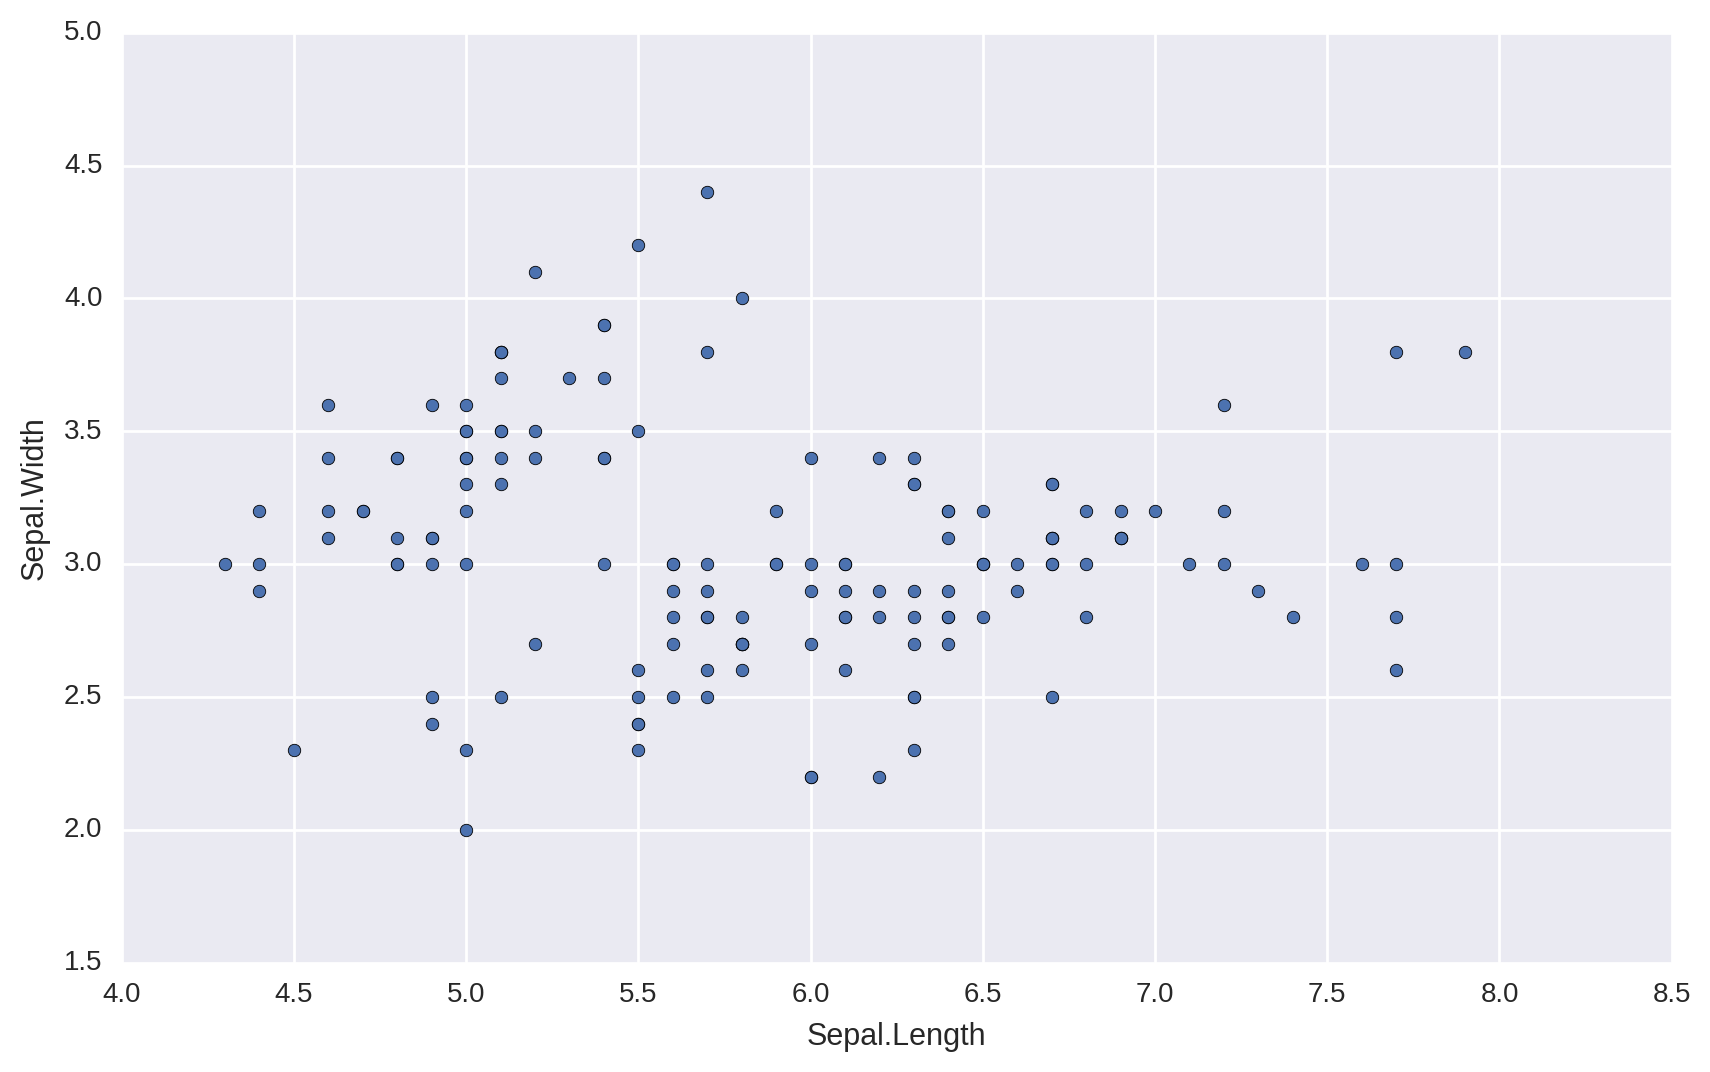

In [5]:
p = iris.plot('Sepal.Length', 'Sepal.Width', kind='scatter')

#### bar plots

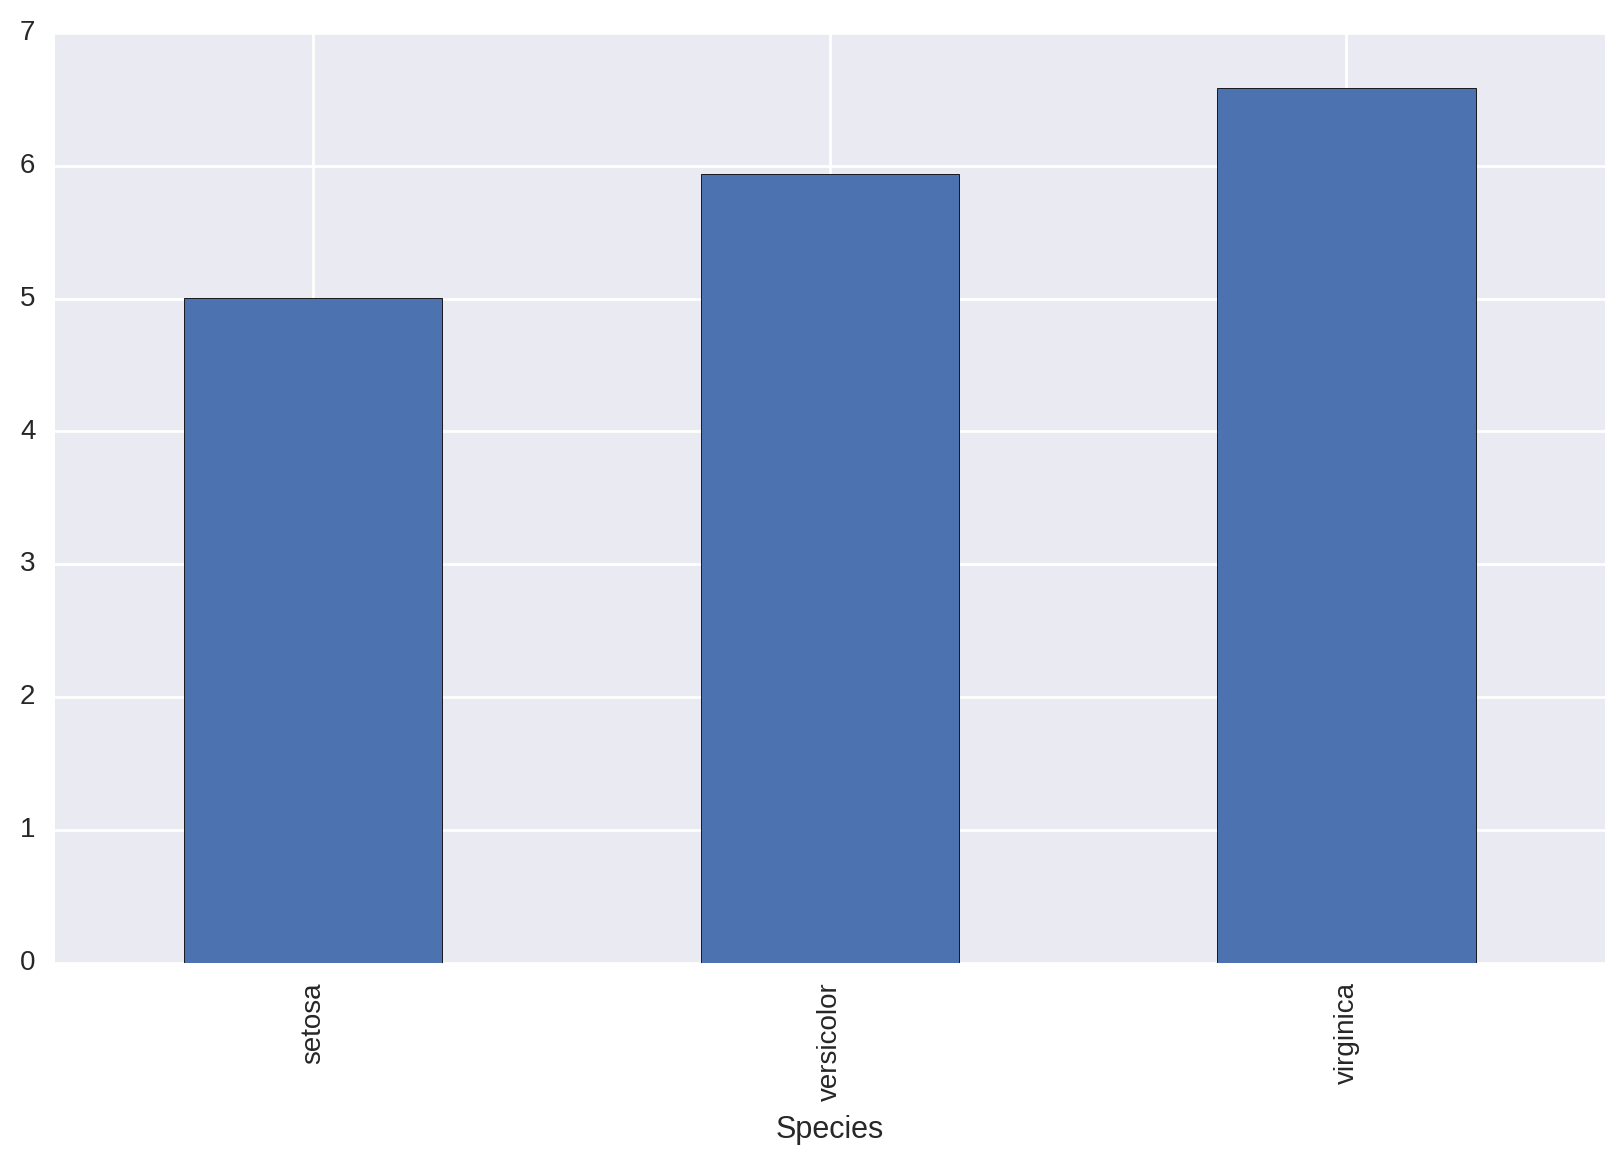

In [6]:
data = iris.groupby('Species').mean()
p = data.plot(y='Sepal.Length', kind='bar', legend=False)

#### line plots

In [7]:
orders = pd.read_csv('./assets/data/aw_orders.csv', parse_dates=['OrderDate'])

In [8]:
orders.head()

,SalesOrderID,SalesOrderDetailID,OrderDate,DueDate,ShipDate,EmployeeID,CustomerID,SubTotal,TaxAmt,Freight,TotalDue,ProductID,OrderQty,UnitPrice,UnitPriceDiscount,LineTotal
0,43659,1,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,776,1,2024.994,0.0,2024.994
1,43659,2,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,777,3,2024.994,0.0,6074.982
2,43659,3,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,778,1,2024.994,0.0,2024.994
3,43659,4,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,771,1,2039.994,0.0,2039.994
4,43659,5,2011-05-31,6/12/2011,6/7/2011,279,1045,20565.6206,1971.5149,616.0984,23153.2339,772,1,2039.994,0.0,2039.994


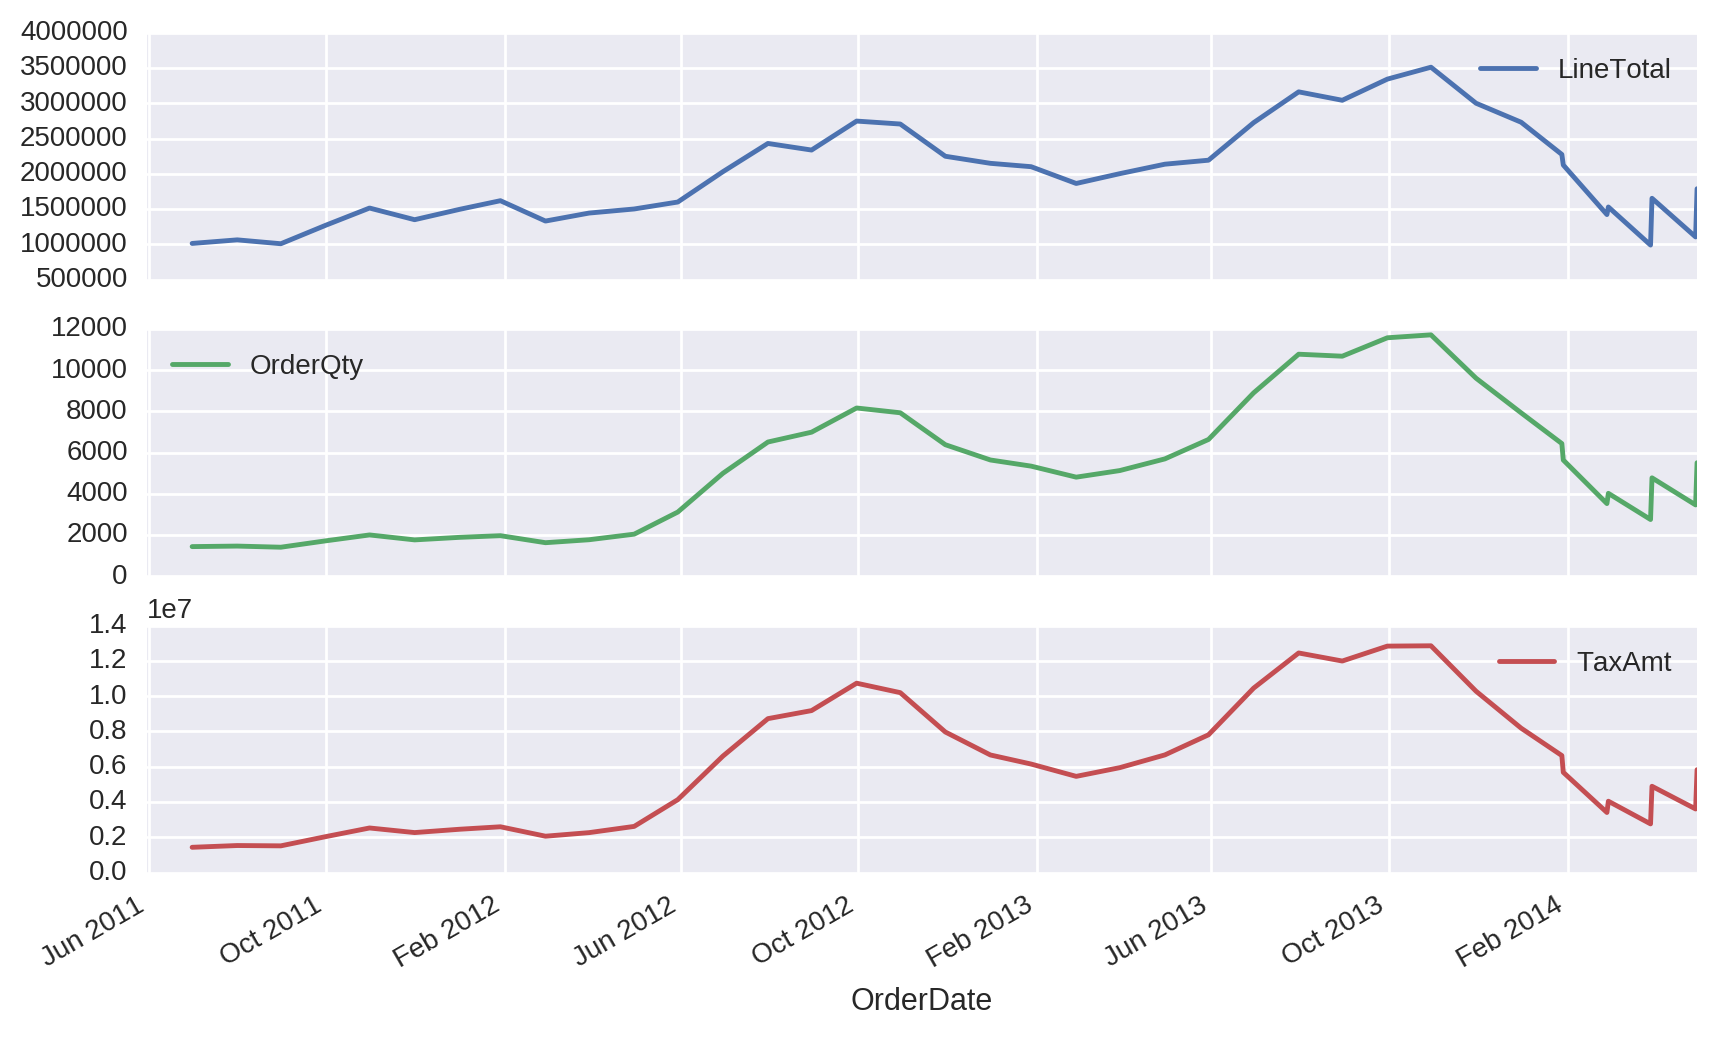

In [12]:
ts = orders.groupby('OrderDate')['LineTotal', 'OrderQty', 'TaxAmt'].sum()
p = ts.rolling(5, min_periods=2).mean().plot(subplots=True)

#### histograms

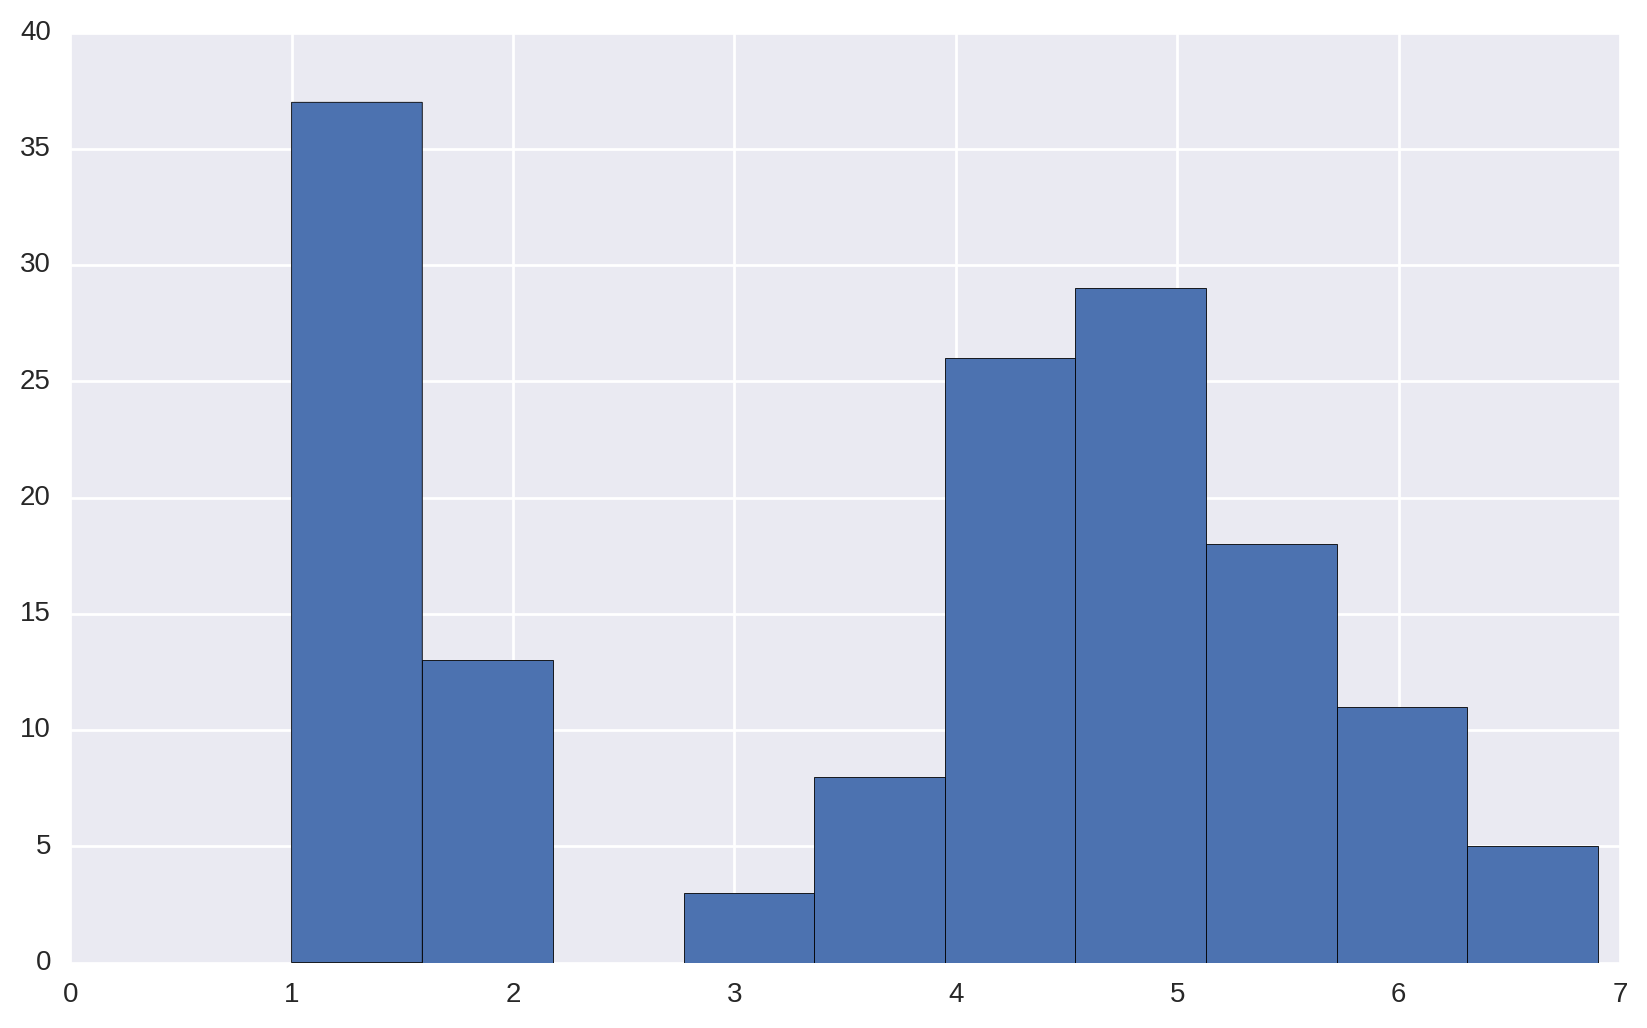

In [13]:
p = iris['Petal.Length'].hist()

### Seaborn
Seaborn är ett visualiseringsbibliotek från Stanford som underlättar arbetet med statistiska visualiseringar oerhört jämfört med Pandas. Biblioteket innehåller en mängd paketerade visualiseringar som gör svåra saker enkla.

#### visualisering av distributioner

/home/kaalih/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


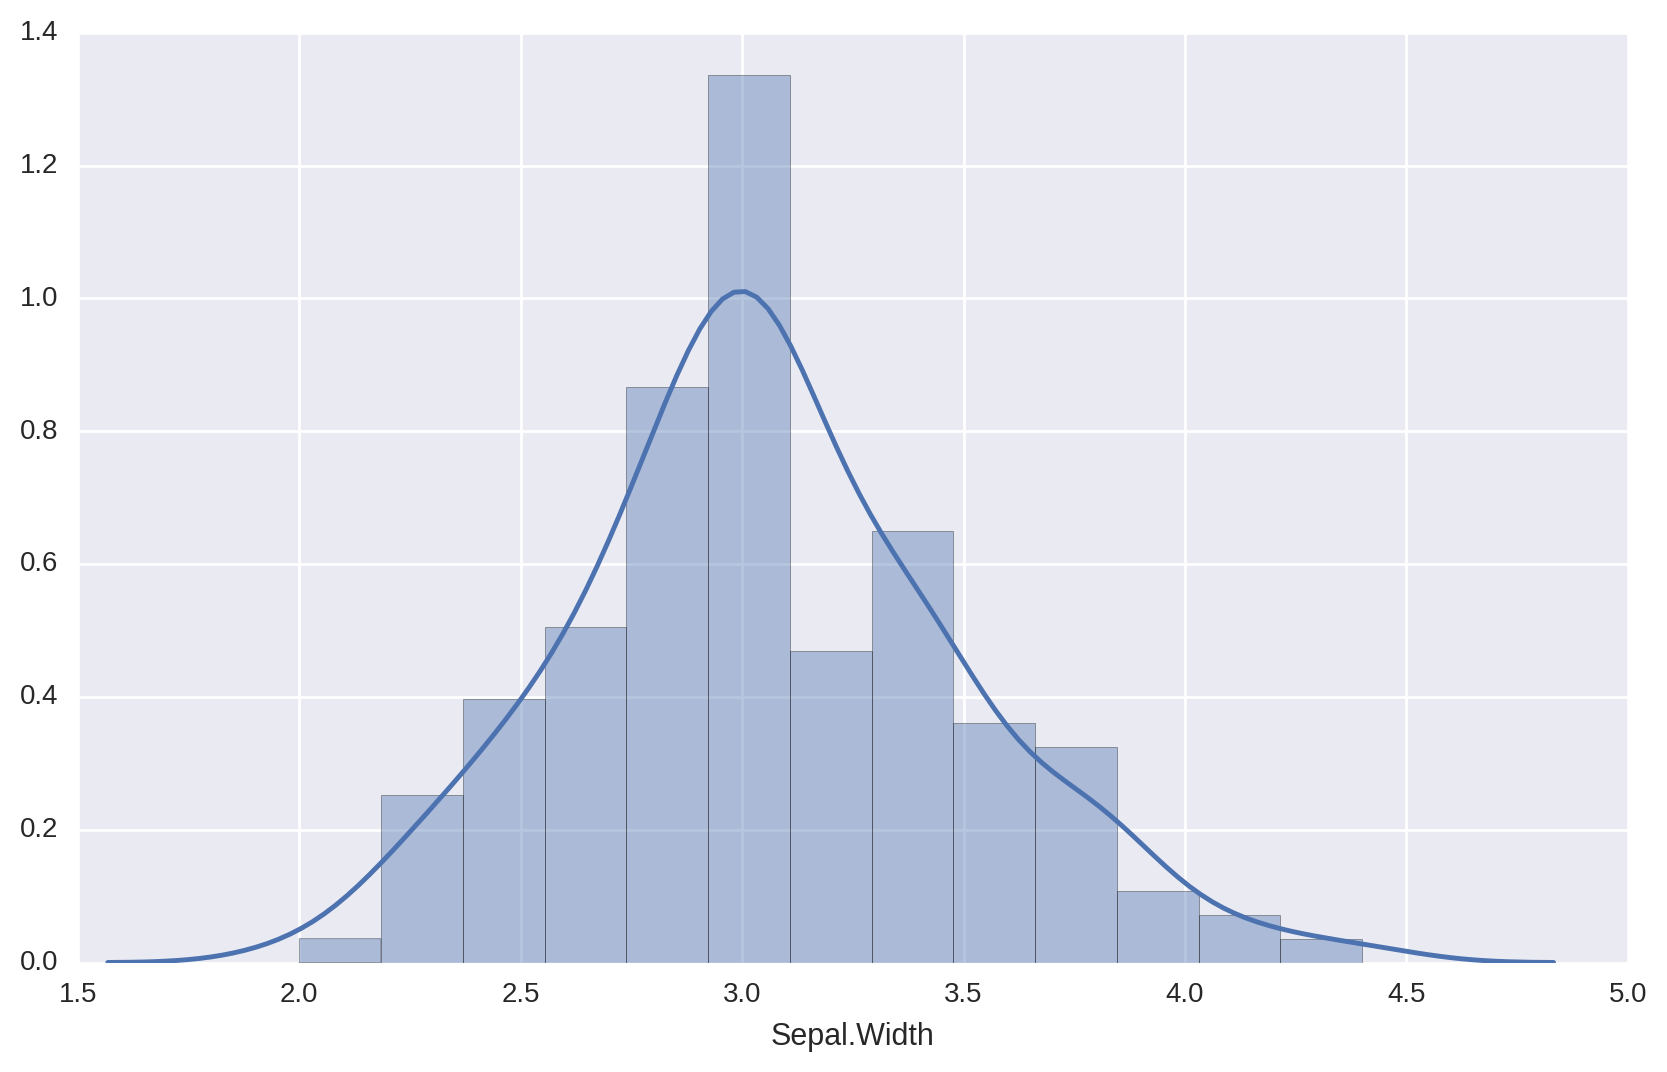

In [14]:
p = sns.distplot(iris['Sepal.Width'])

Det finns ett antal parametrar att arbeta med för att få det utseende man vill ha men standardutförandet funkar ofta bra.

/home/kaalih/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


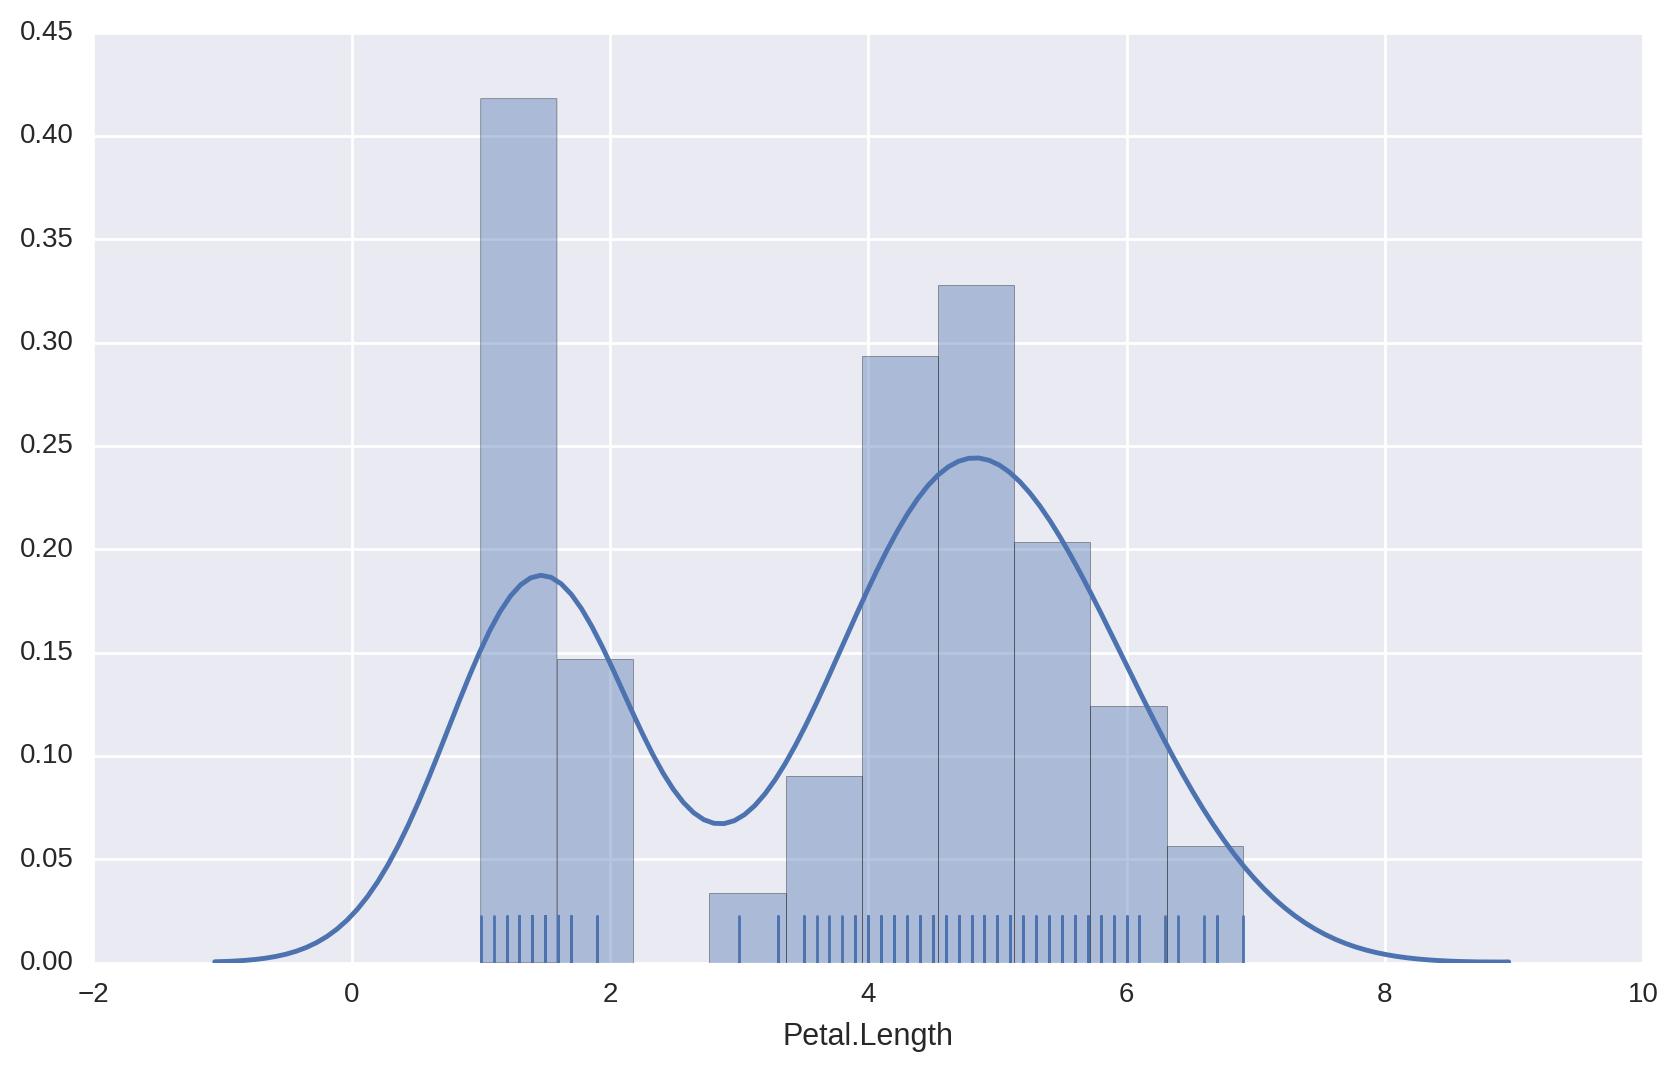

In [15]:
p = sns.distplot(iris['Petal.Length'], bins=10, rug=True)

Vi kan också estimera distributionerna genom att använda `.kdeplot()`.

/home/kaalih/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


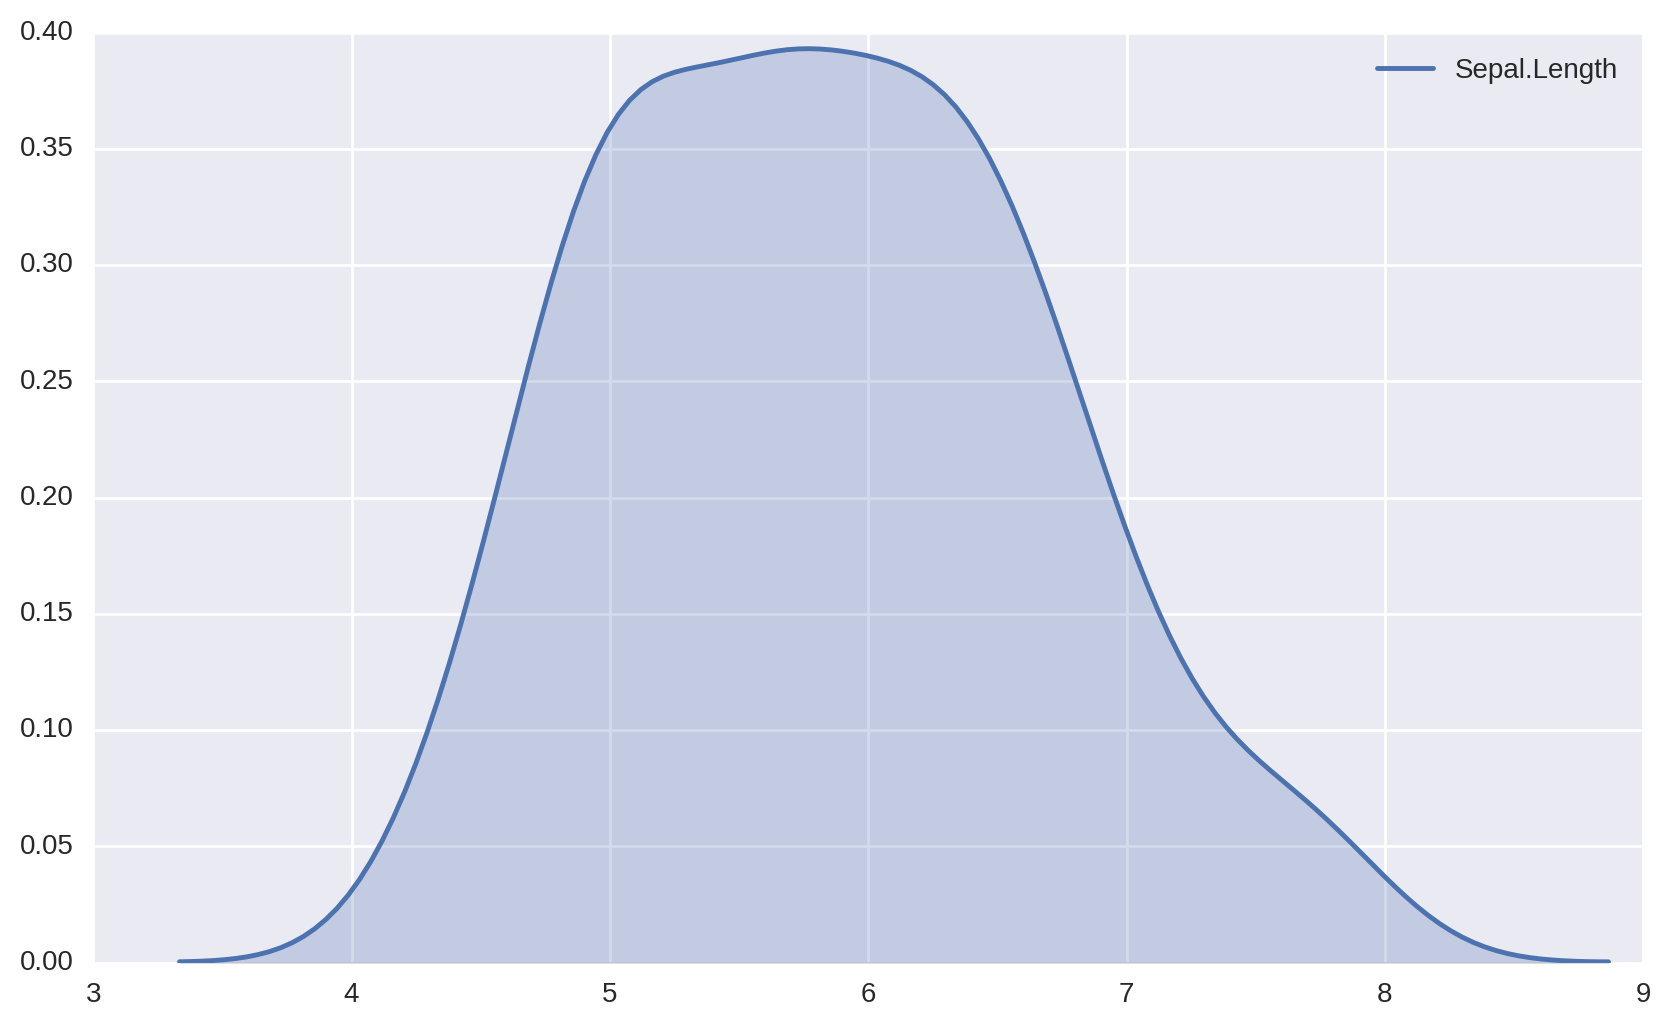

In [16]:
p = sns.kdeplot(iris['Sepal.Length'], shade=True)

Vi kan också plotta två distributioner samtidigt för att jämföra deras utseende.

/home/kaalih/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


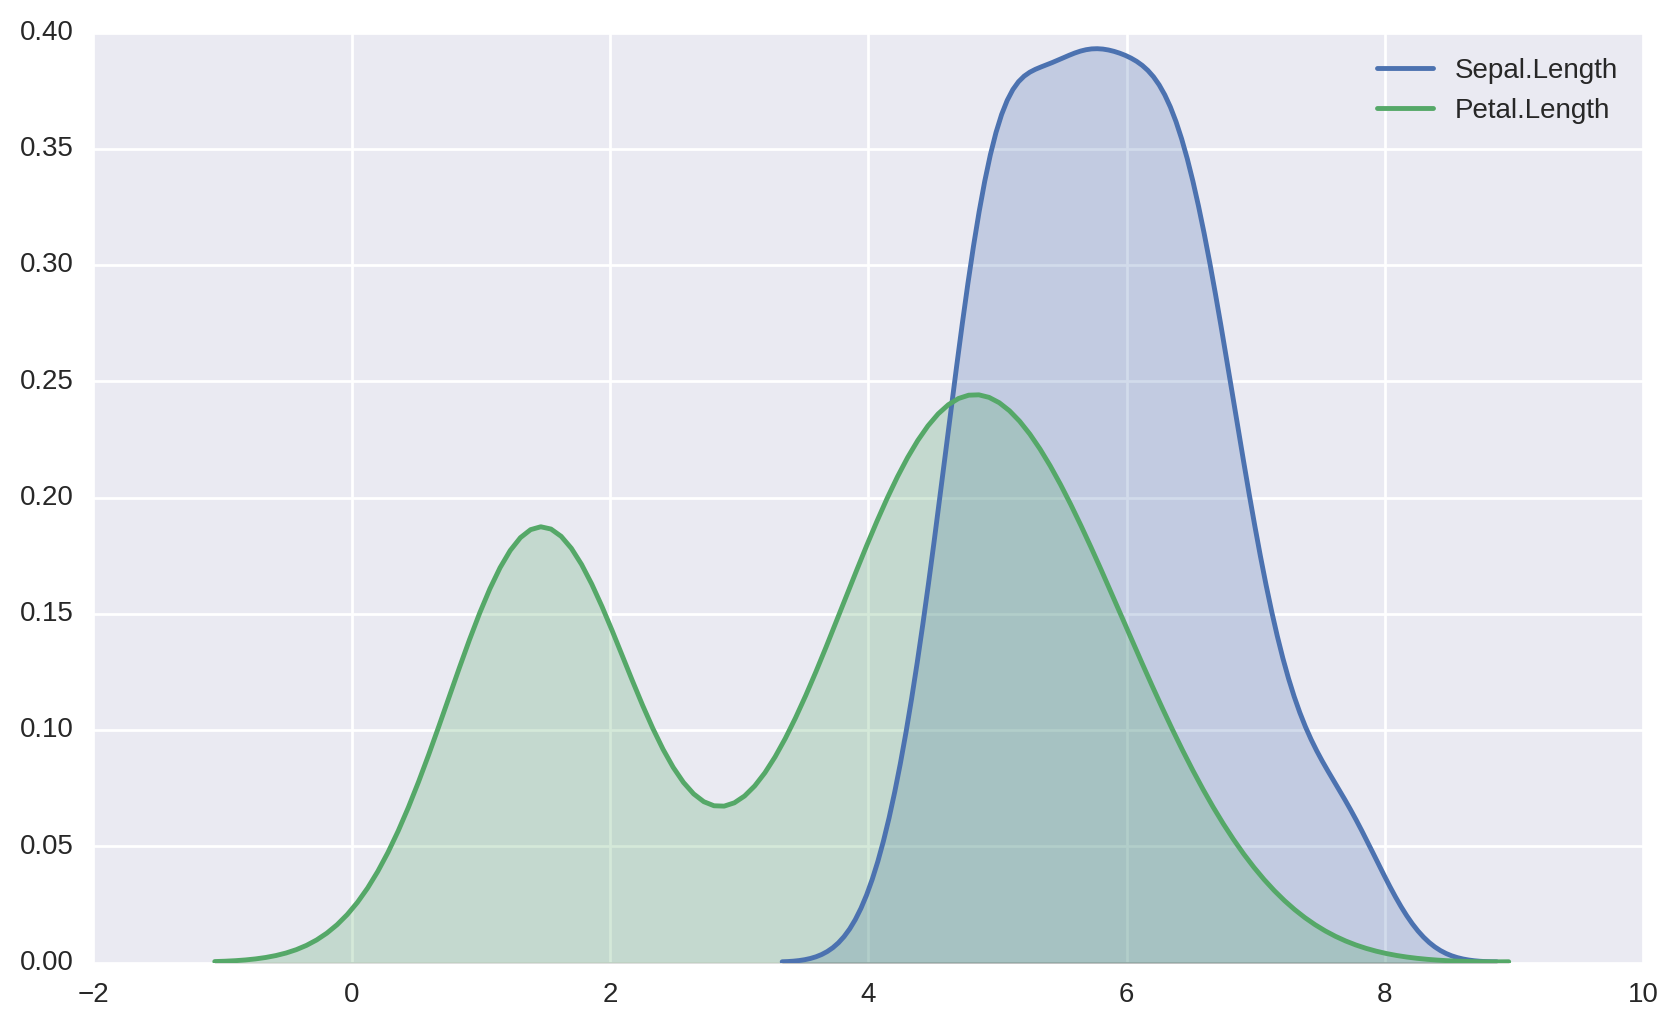

In [17]:
p = sns.kdeplot(iris['Sepal.Length'], shade=True)
p = sns.kdeplot(iris['Petal.Length'], shade=True)

#### scatter plots
För att undersöka två variabler tillsammans är `.jointplot()` en bra visualisering där vi får både en scatterplot och ett histogram för varje variabel.

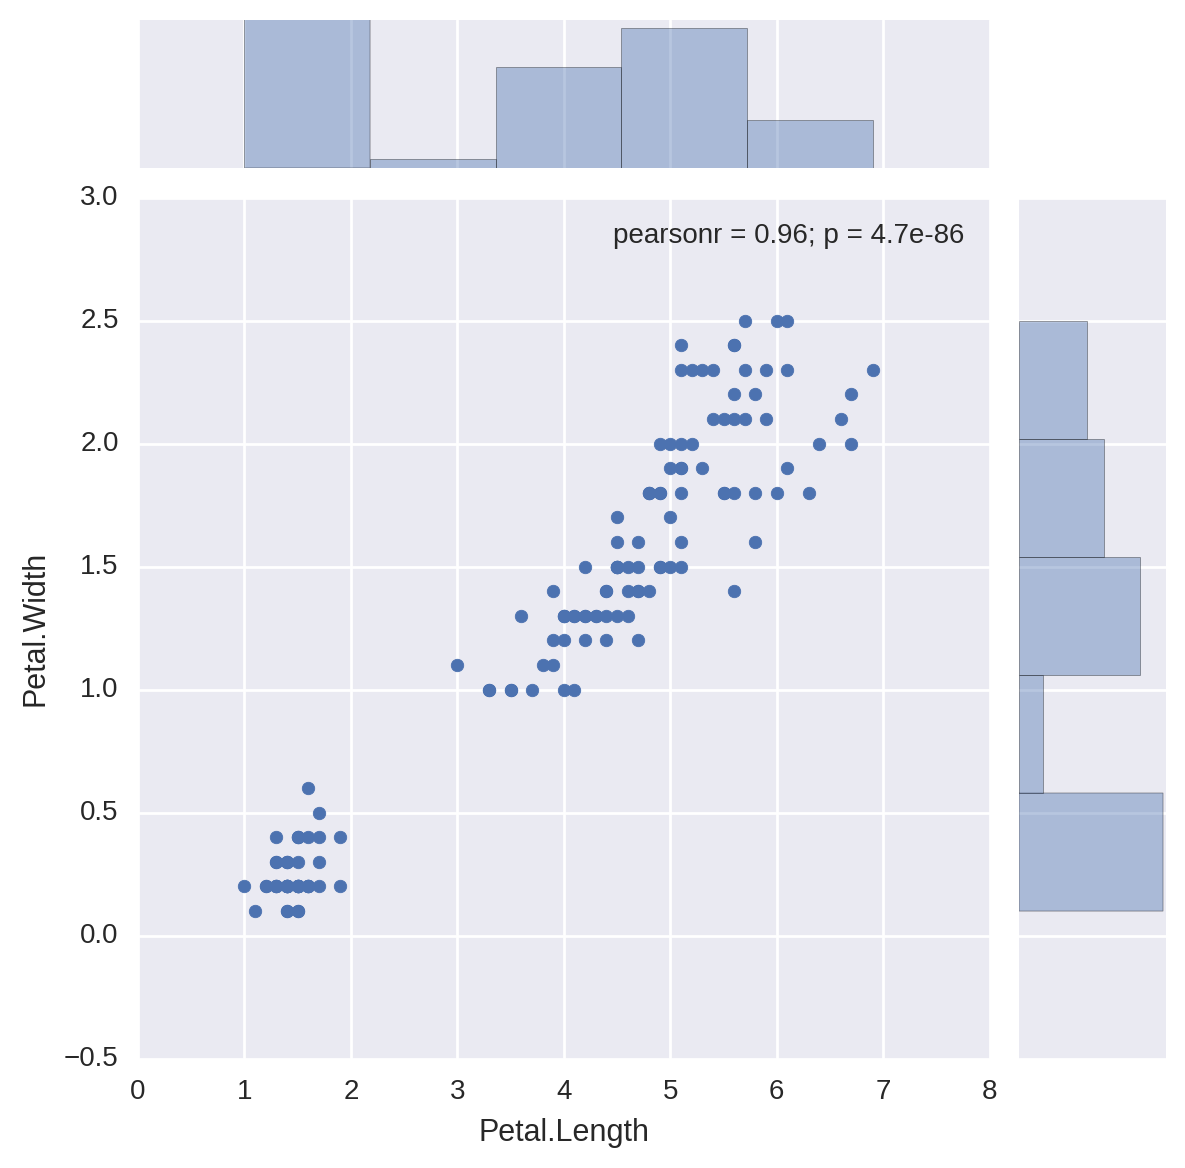

In [18]:
p = sns.jointplot(x='Petal.Length', y='Petal.Width', data=iris)

Vi kan också i det fall vi har större dataset använda oss av en hexplot. 

In [19]:
run10 = pd.read_csv('./assets/data/run10.txt', sep='\t')

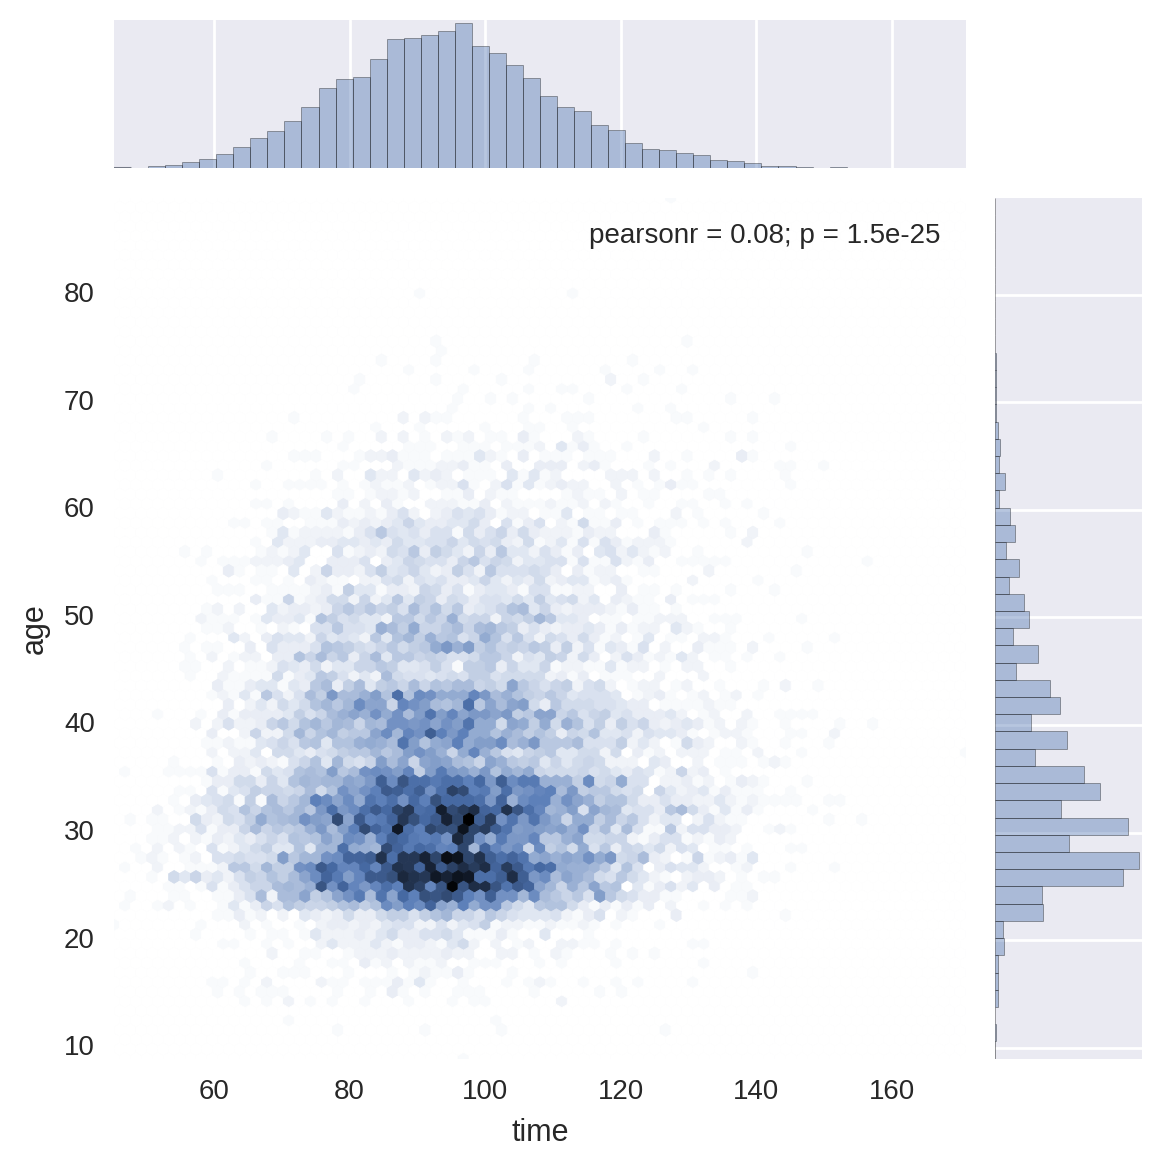

In [20]:
p = sns.jointplot('time', 'age', data=run10, kind='hex')

Om vi vill titta närmre på datat på grund av extrema outliers etc kan vi använda `xlim` och `ylim` enligt nedan.

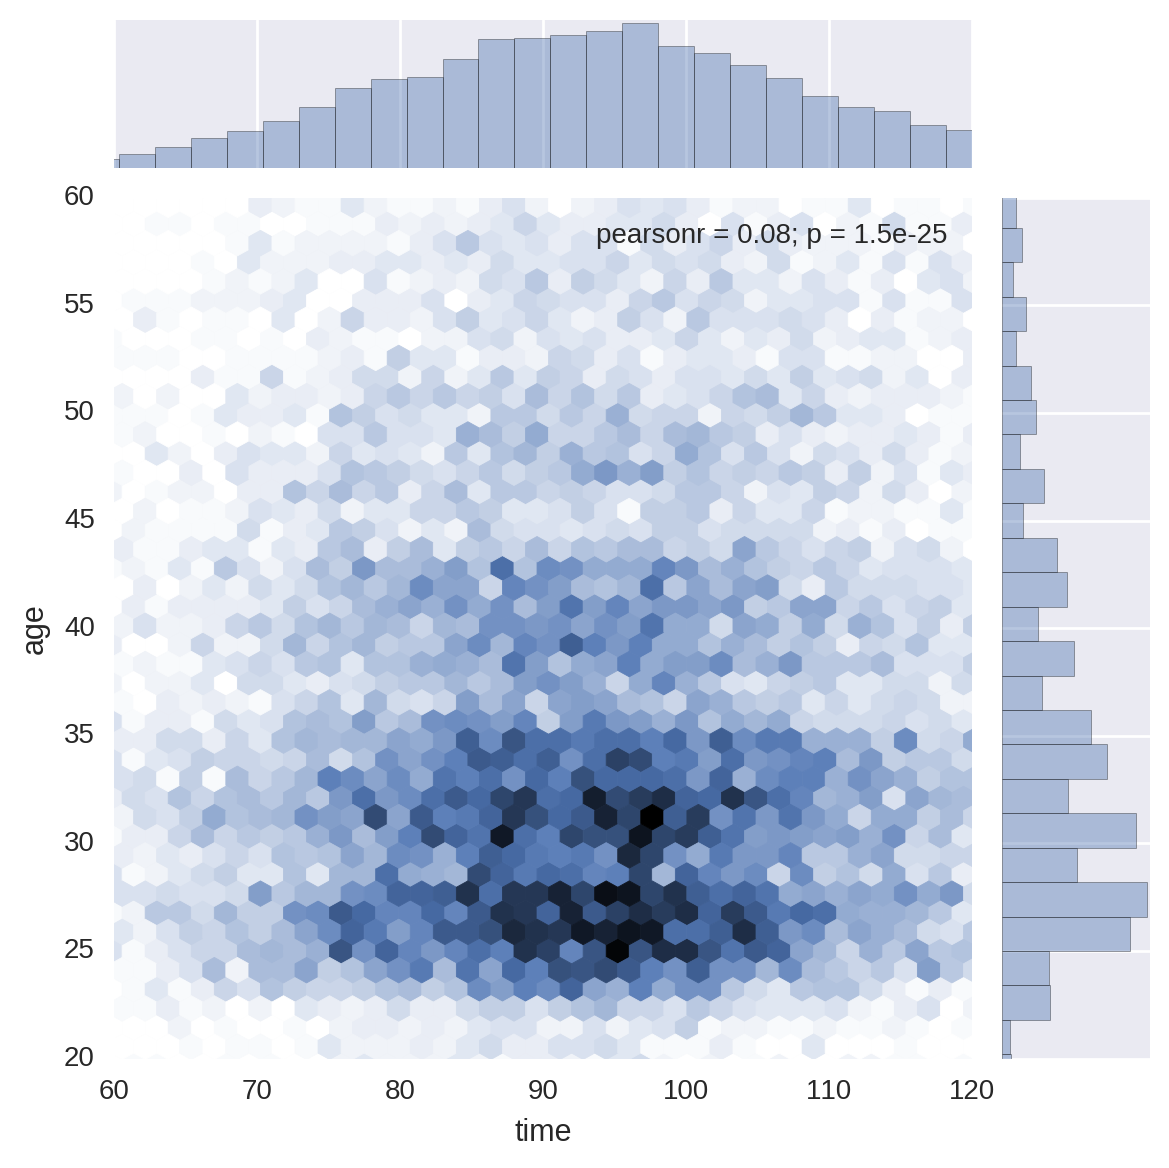

In [21]:
p = sns.jointplot('time', 'age', data=run10, kind='hex', xlim=[60,120], ylim=[20,60])

Med funktionen `.pairplot()` kan vi enkelt plotta parvisa scatter plots för de numeriska variablerna i ett dataset. Den här operationen kan vara väldigt tung för större dataset så det kan vara bra att prova på stickprov och färre kolumner.

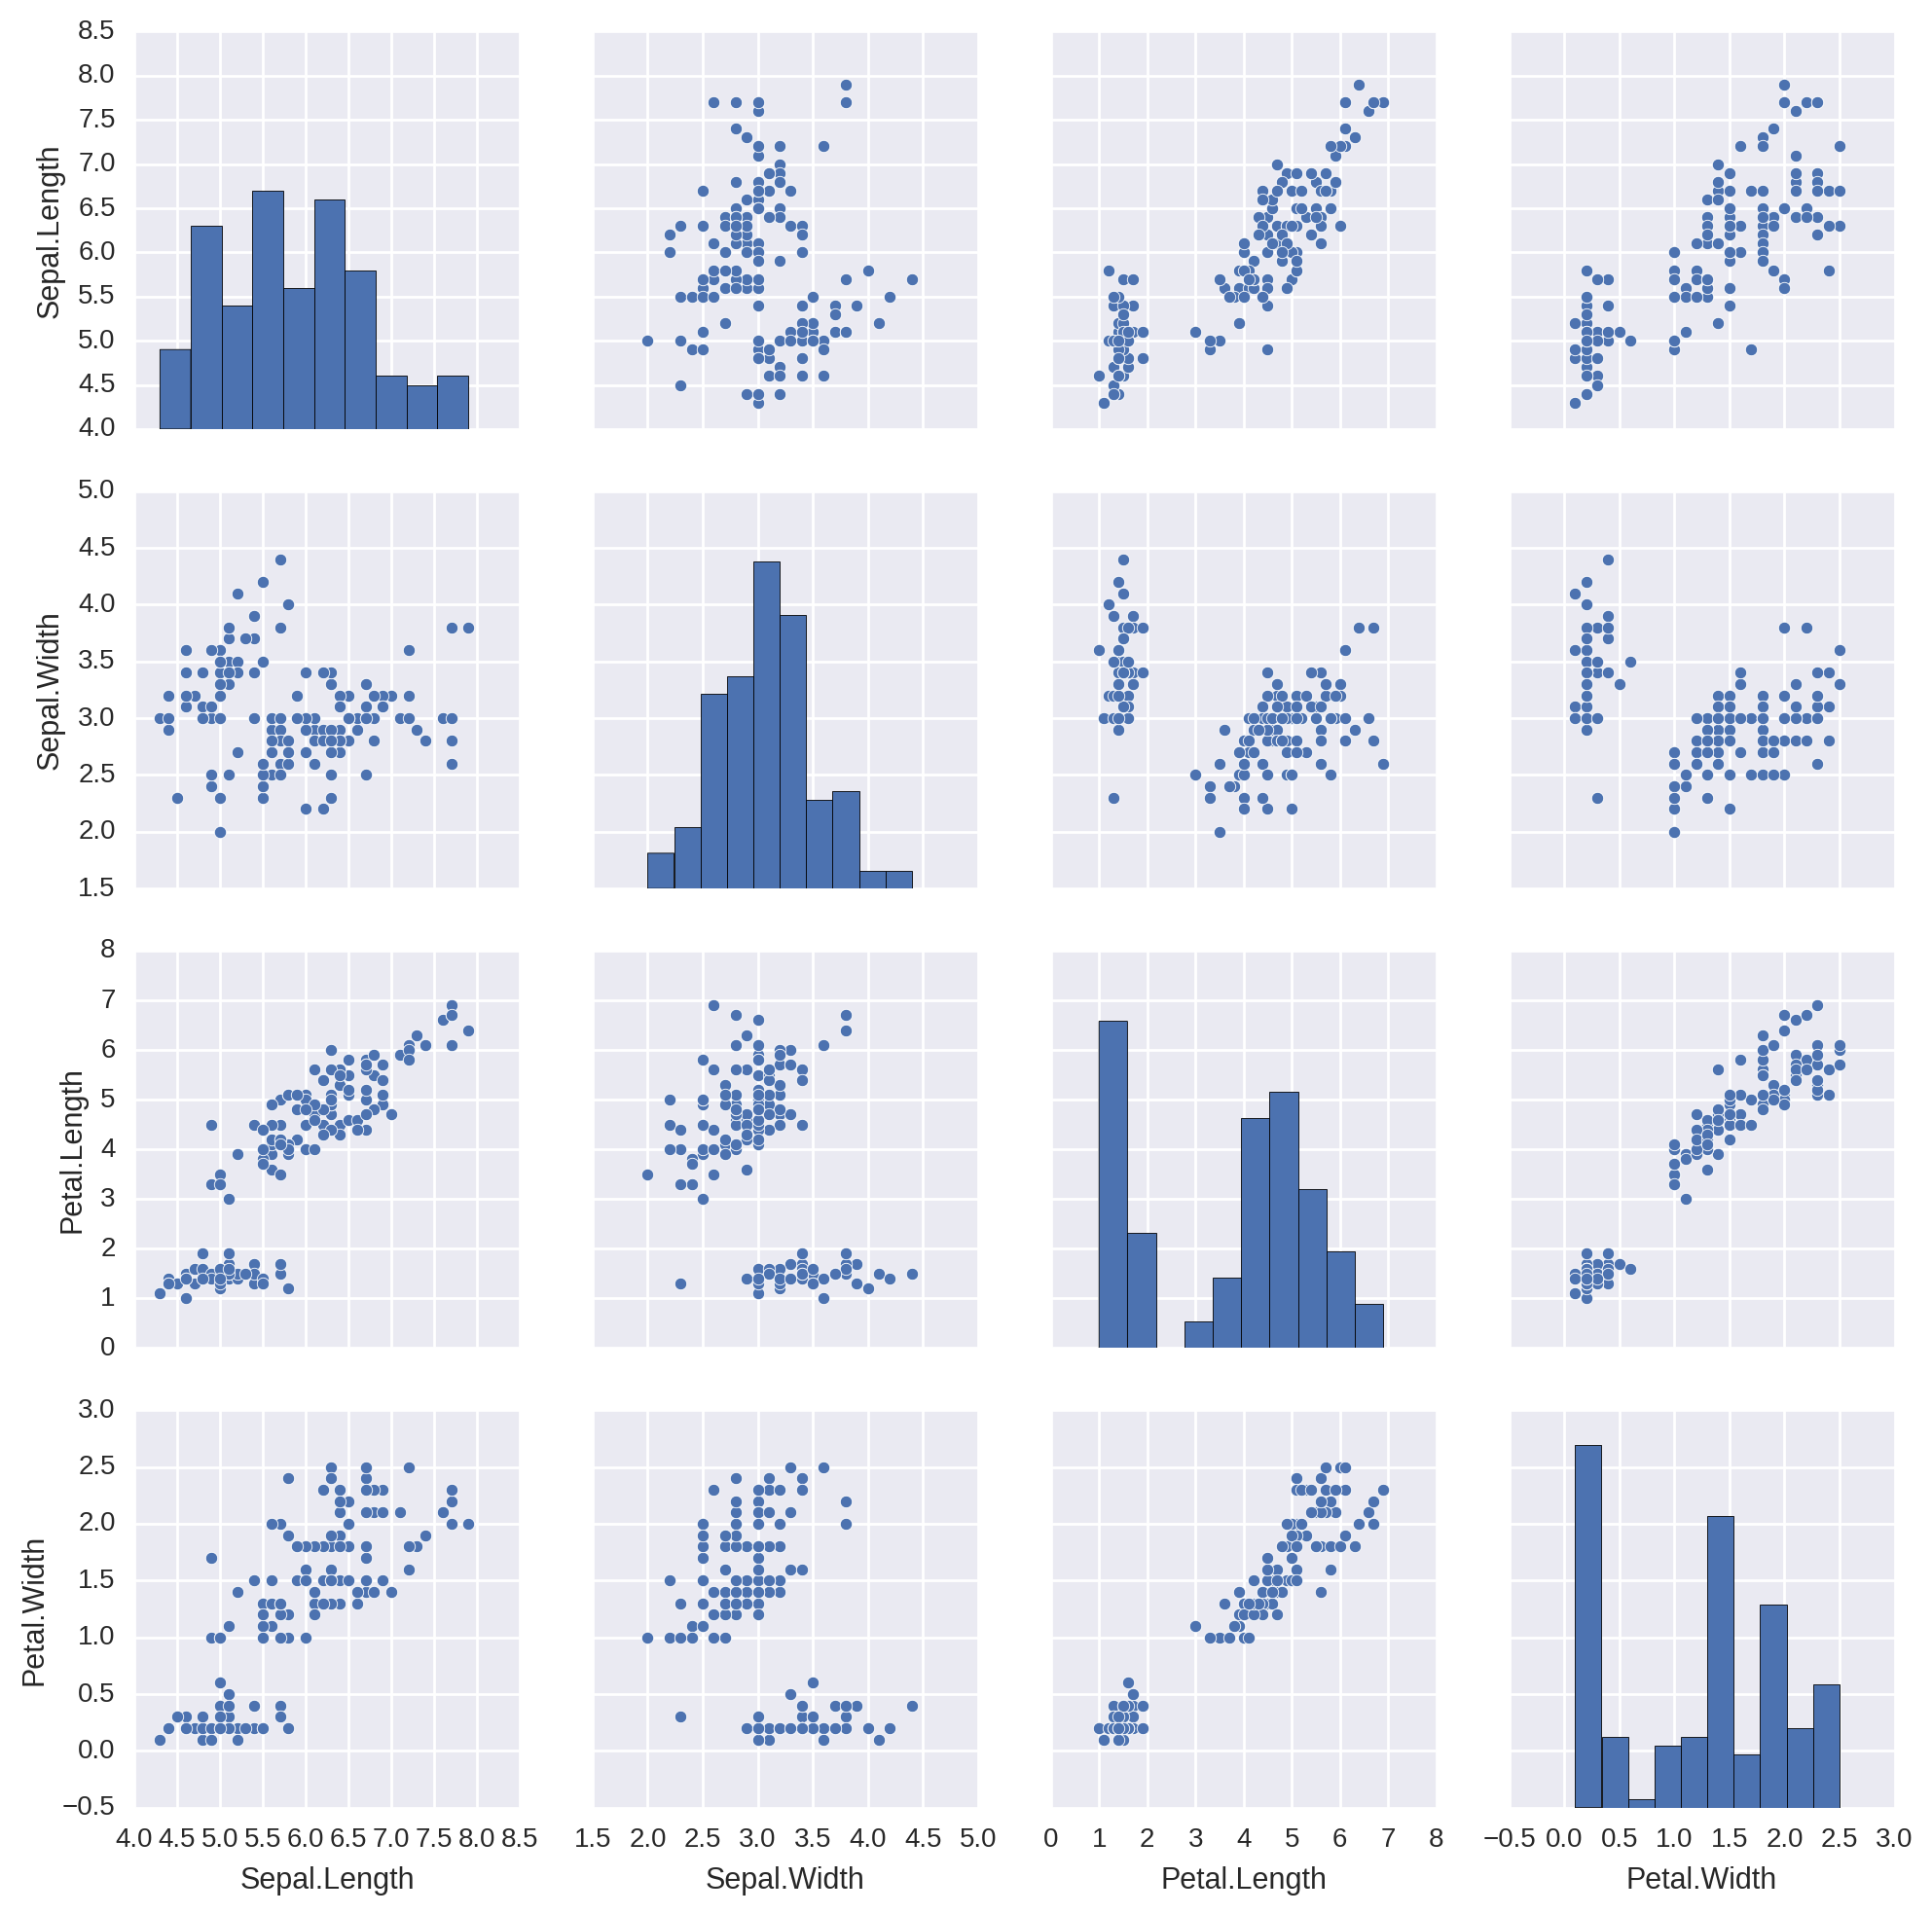

In [22]:
p = sns.pairplot(iris)

Vi kan också visualisera eventuell klasstillhörighet på datat och därmed få en god överblick av kluster exempelvis.

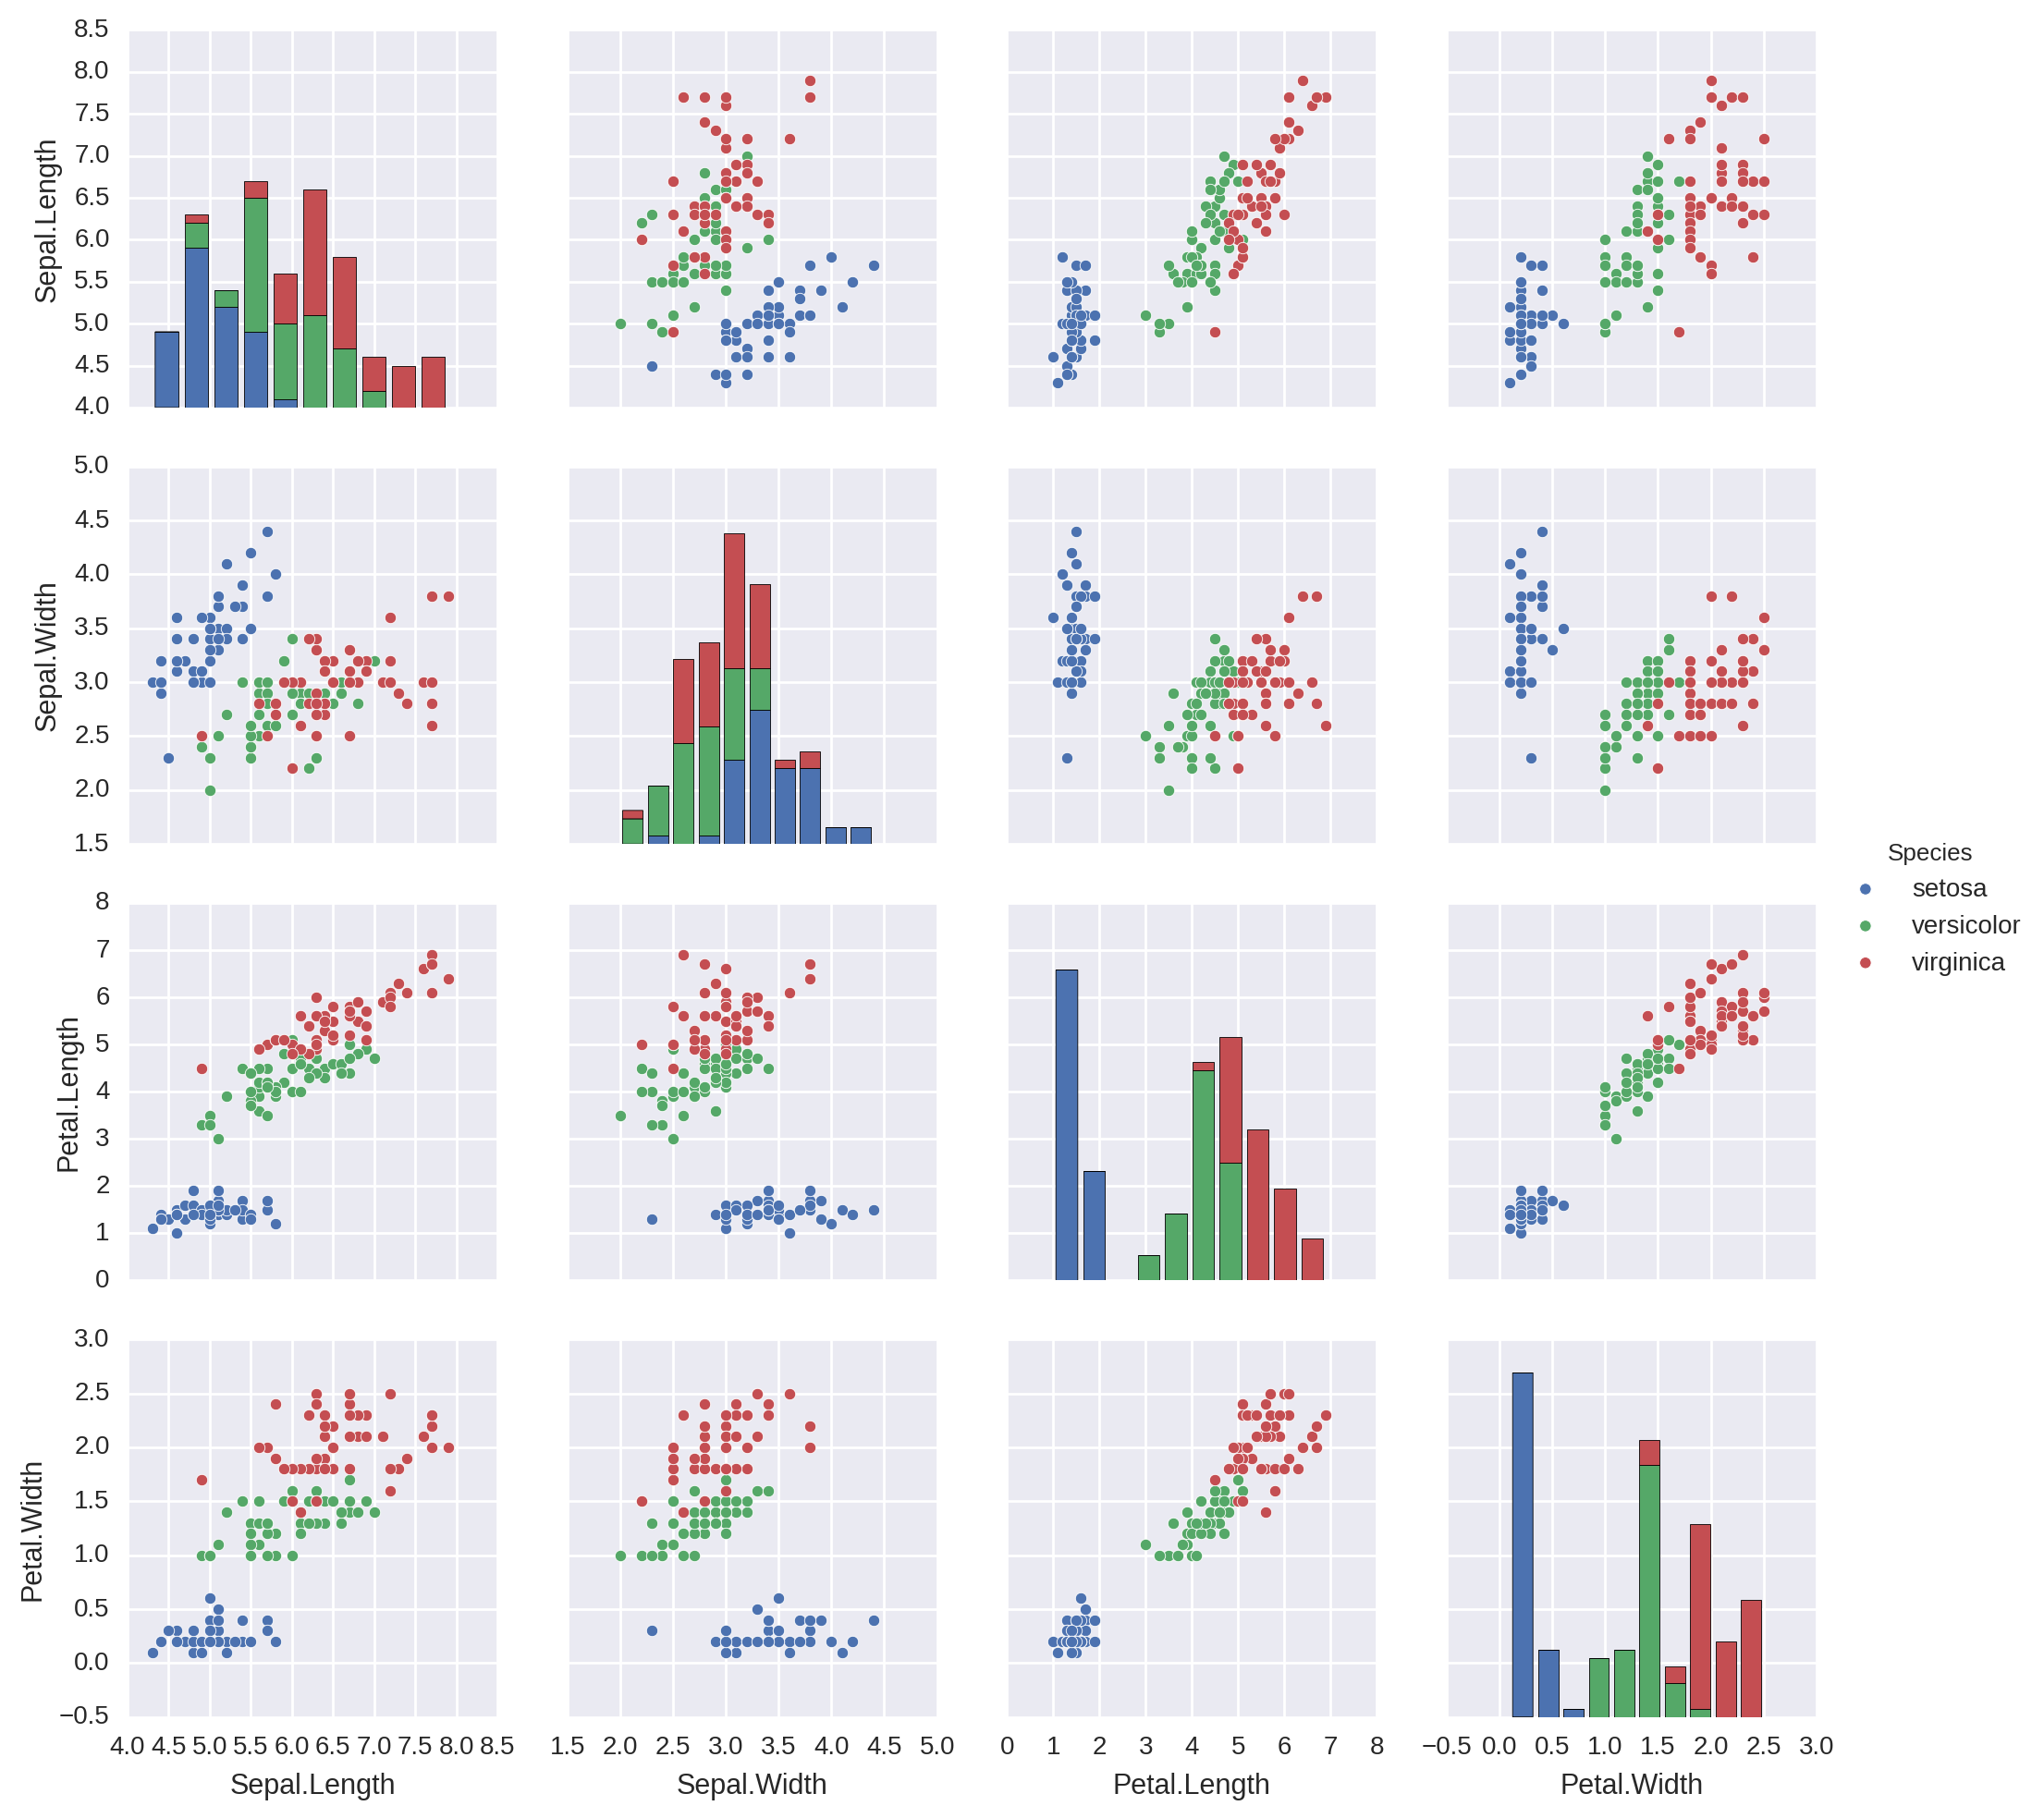

In [23]:
p = sns.pairplot(iris, hue='Species')

#### linjära samband och regression

En bra visualisering av linjära samband är `.regplot()` som visualiserar data i form av en scatter plot med en linjär model anpassade efter datat. 

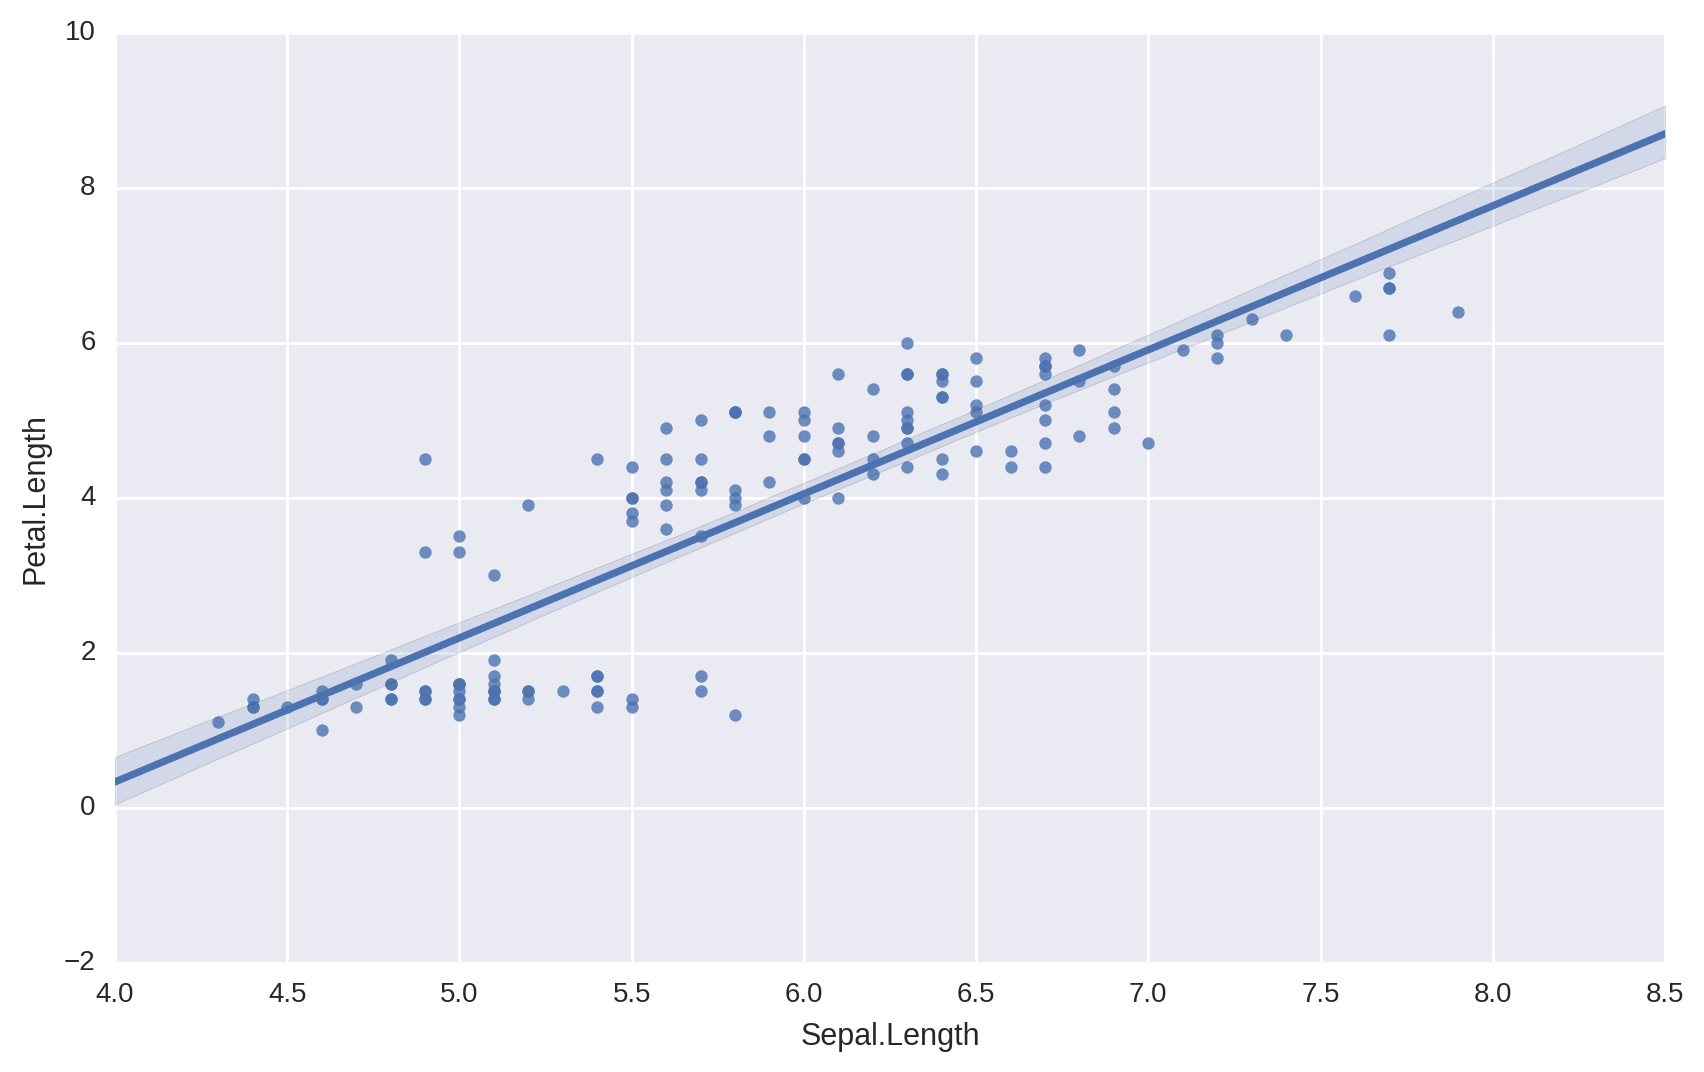

In [24]:
p = sns.regplot('Sepal.Length', 'Petal.Length', iris)

En `.regplot()` accepterar valfria datastrukturer men för Pandas dataframes kan man även använda `.lmplot()` som innehåller fler funktioner.

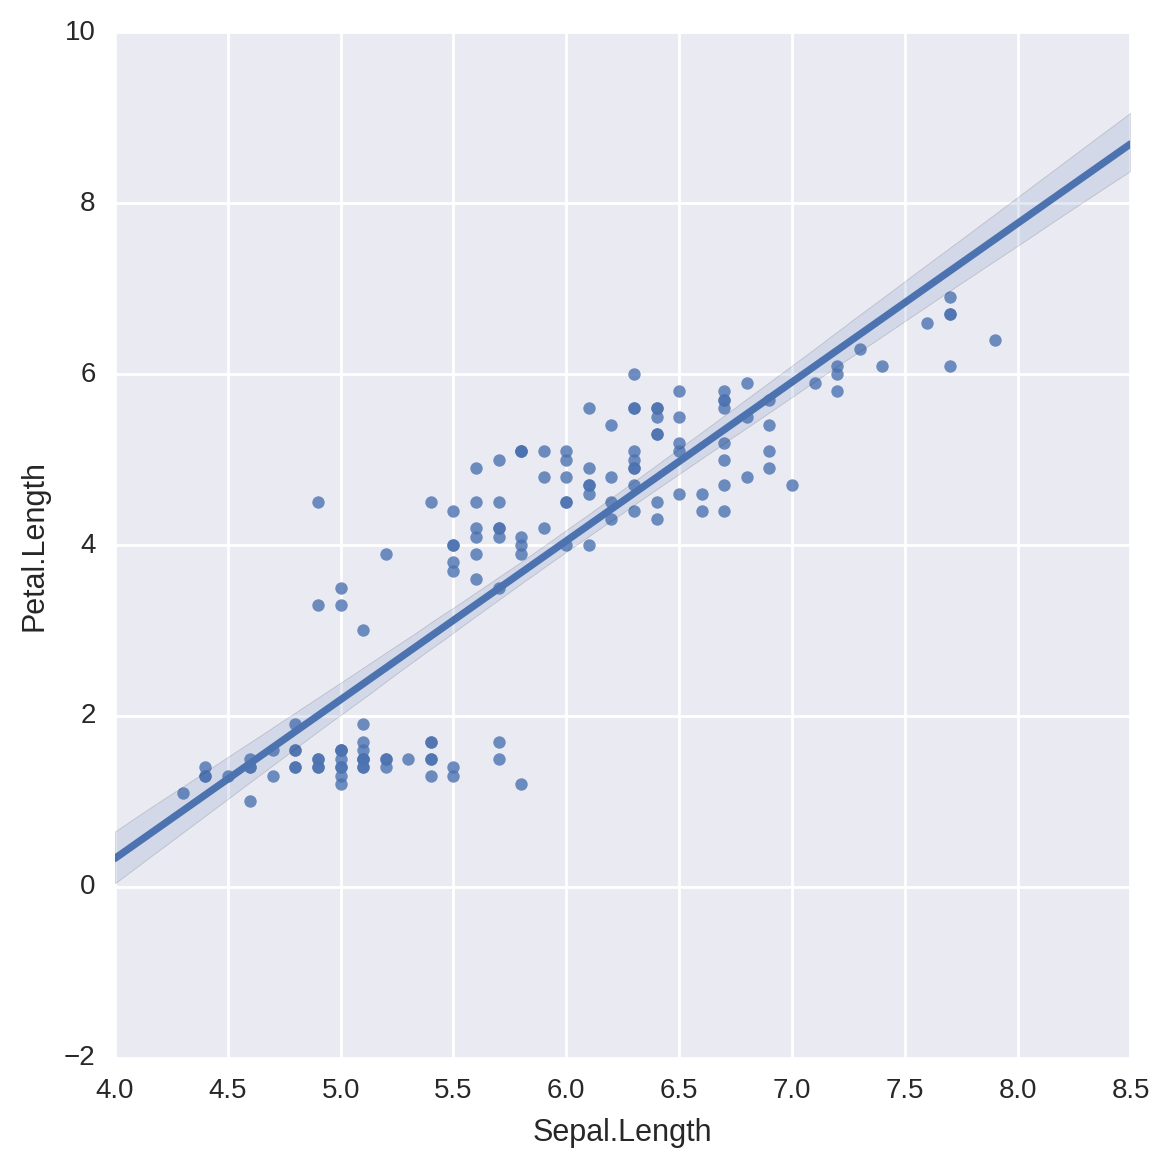

In [25]:
p = sns.lmplot('Sepal.Length', 'Petal.Length', iris, size=6)

Exempelvis kan vi titta på klasstillhörighet genom att ange parametern `hue`.

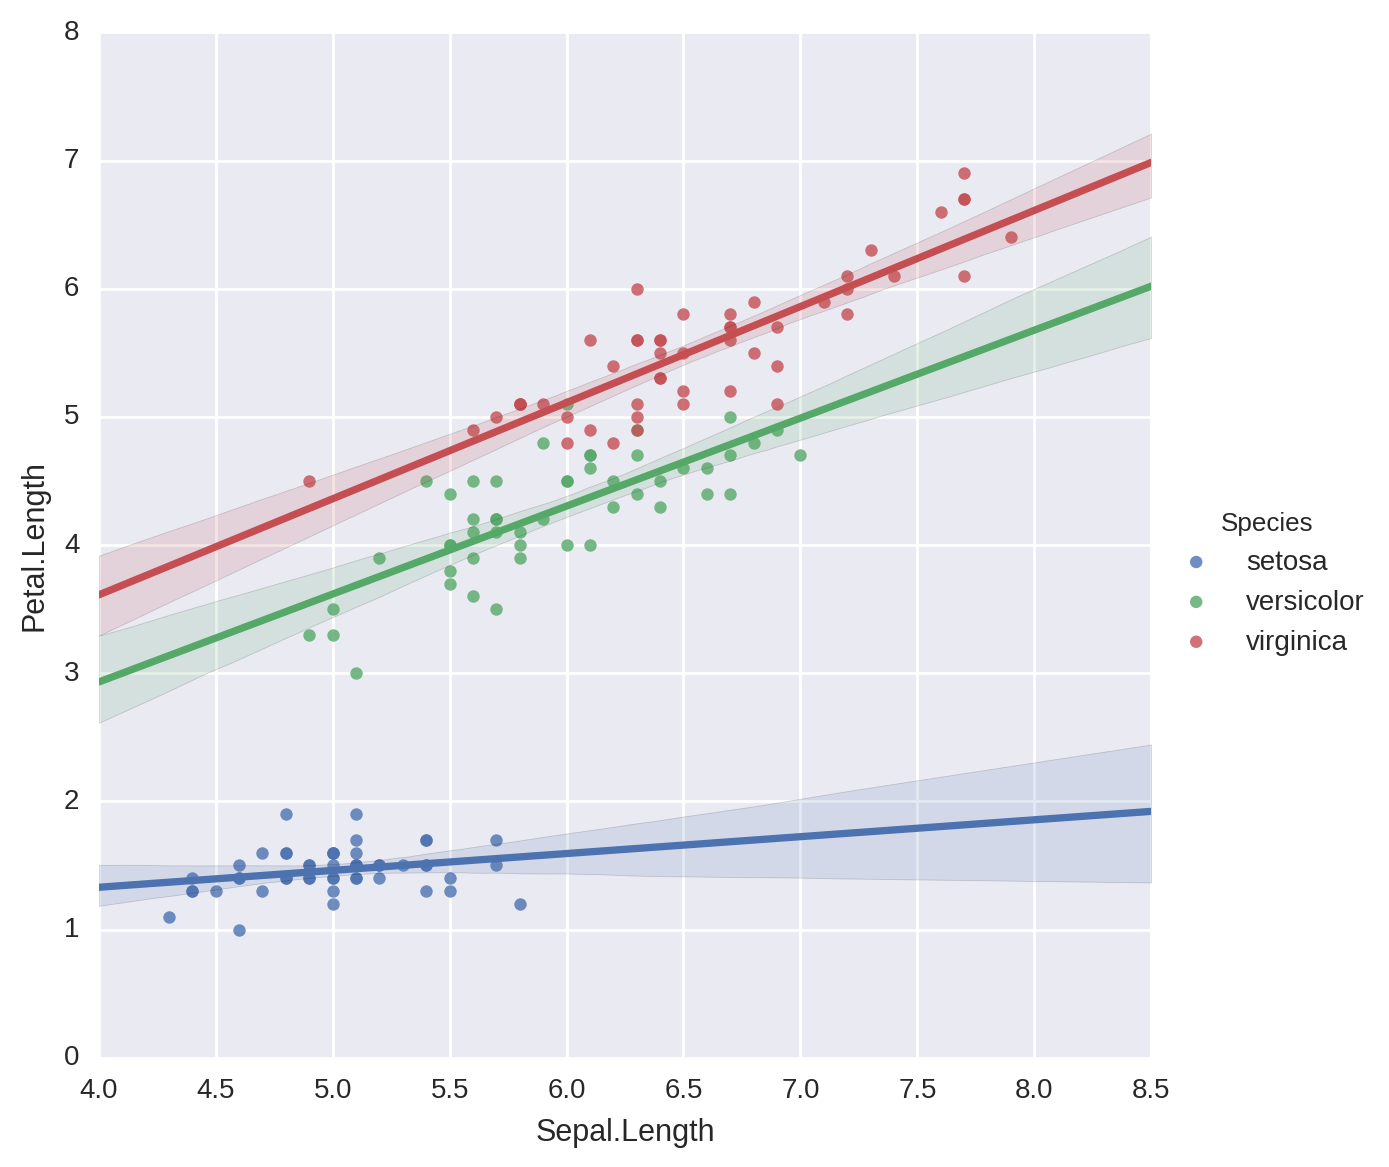

In [26]:
p = sns.lmplot('Sepal.Length', 'Petal.Length', data=iris, hue='Species', size=6)

Vi kan också titta på hur en variabel ser ut per klass genom `.factorplot()`. 

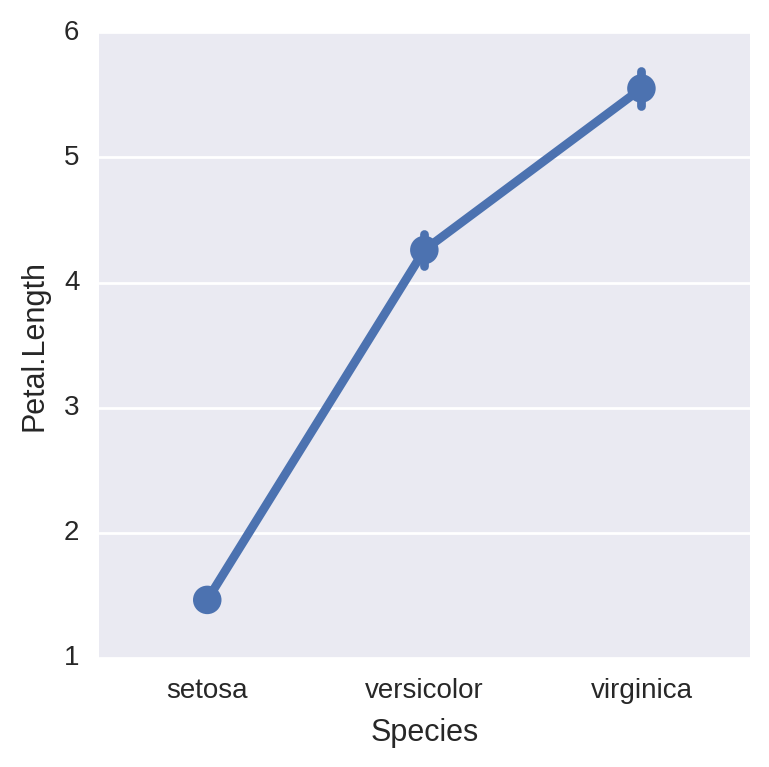

In [27]:
p = sns.factorplot('Species', 'Petal.Length', data=iris, )

Factorplot visualiserar även ett konfidensintervall för att ge visuell uppskattning om vi har en signifikant avvikelse mellan klaser. I det här exemplet tar jag ett sample på 100 observationer och plottar med 95%-igt konfidensintervall.

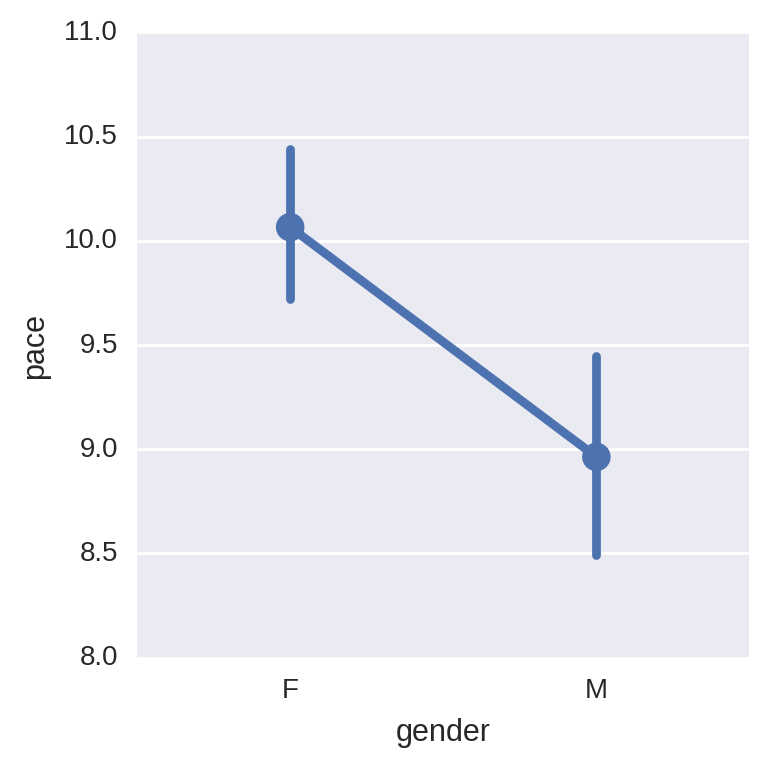

In [28]:
run10_sample = run10.sample(100)

p = sns.factorplot('gender', 'pace', data=run10_sample, ci=95)

#### facetteringar
I fall där man vill visualisera data utifrån flera dimensioner är facetteringar eller trellisplots ett bra verktyg. Seaborn har stöd för detta vilket nedanstående exempel visar på.

In [29]:
tips = pd.read_csv('./assets/data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


om vi bara vill titta på korrelationen utifrån en specifik klass kan vi göra det genom att använda oss av färgkodning.

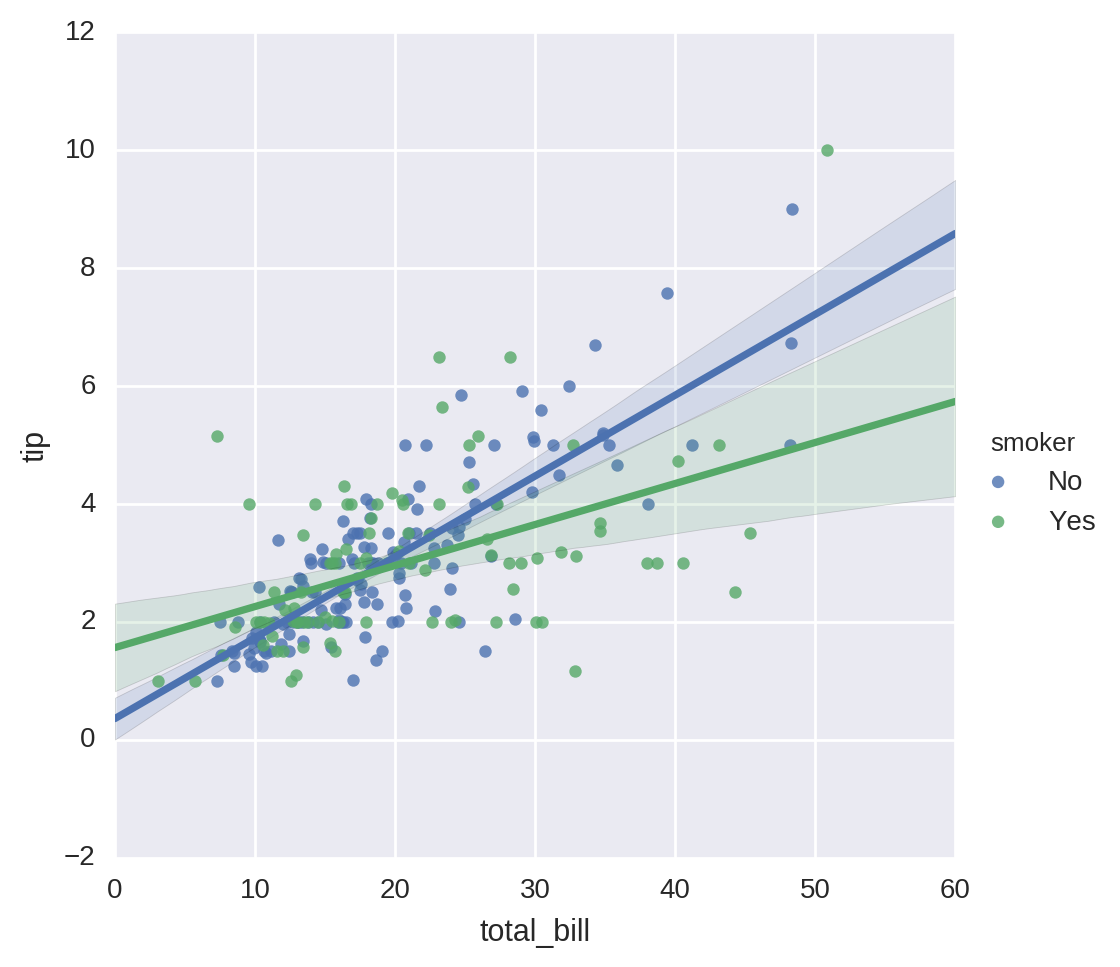

In [30]:
p = sns.lmplot('total_bill', 'tip', tips, hue='smoker')

Om vi vill se fler dimensioner ät det lämpligt att facettera dessa vilket enkelt gör genom att ange `col` eller `row`.

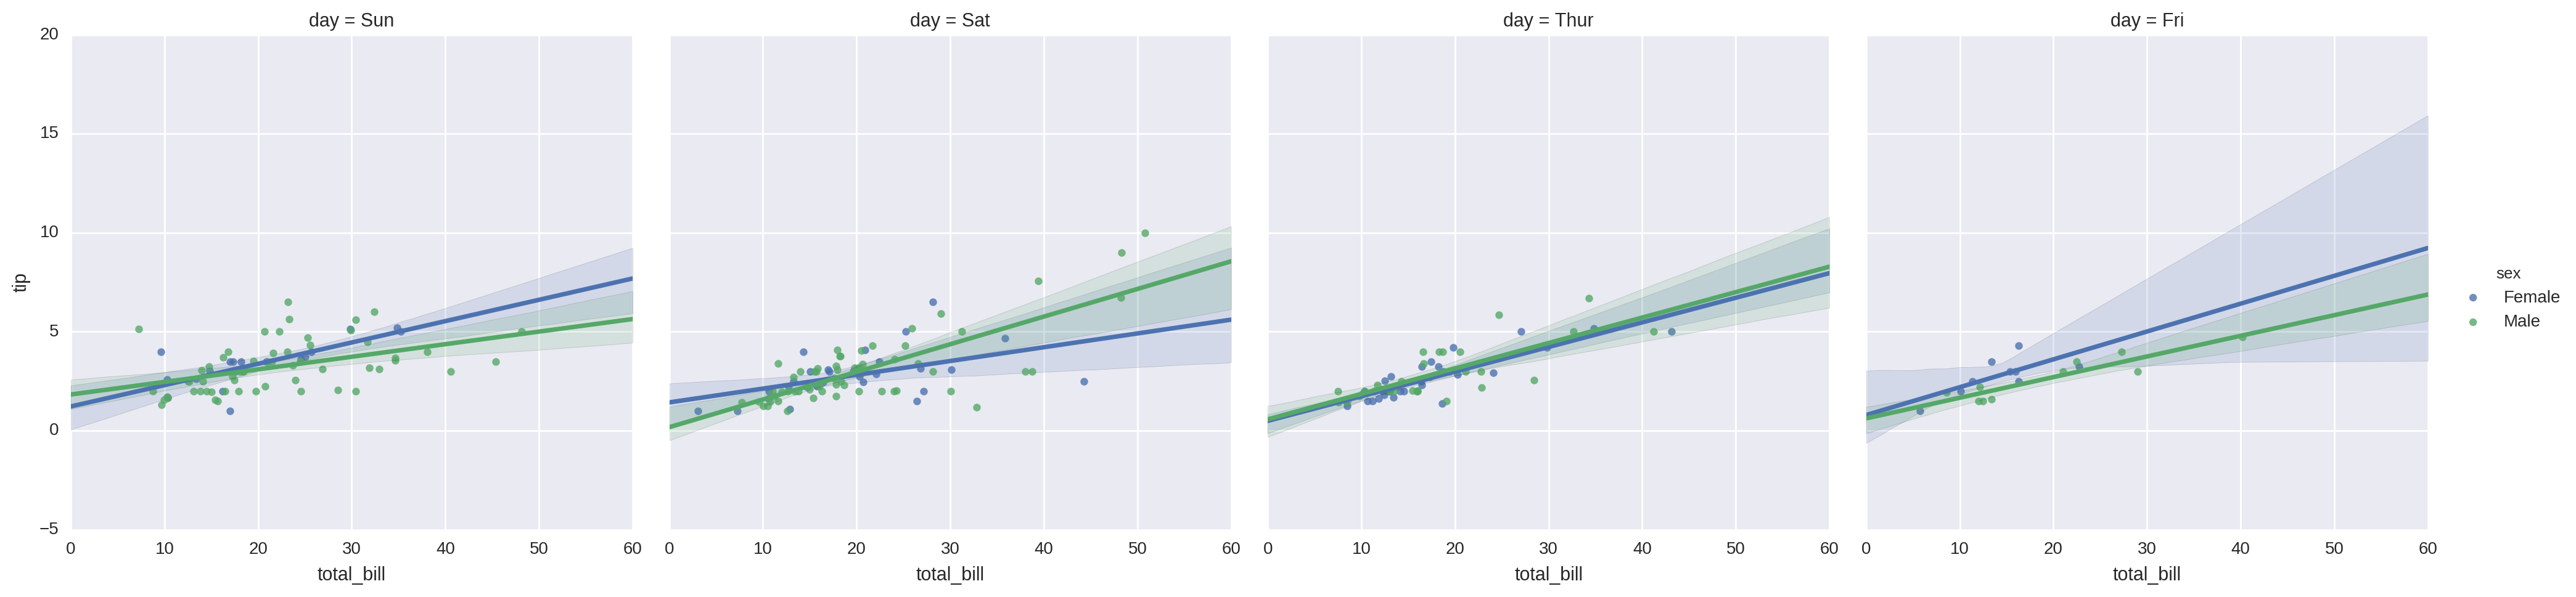

In [31]:
p = sns.lmplot('total_bill', 'tip', tips, hue='sex', col='day')

Vi kan såklart ange både och för att få en matris.

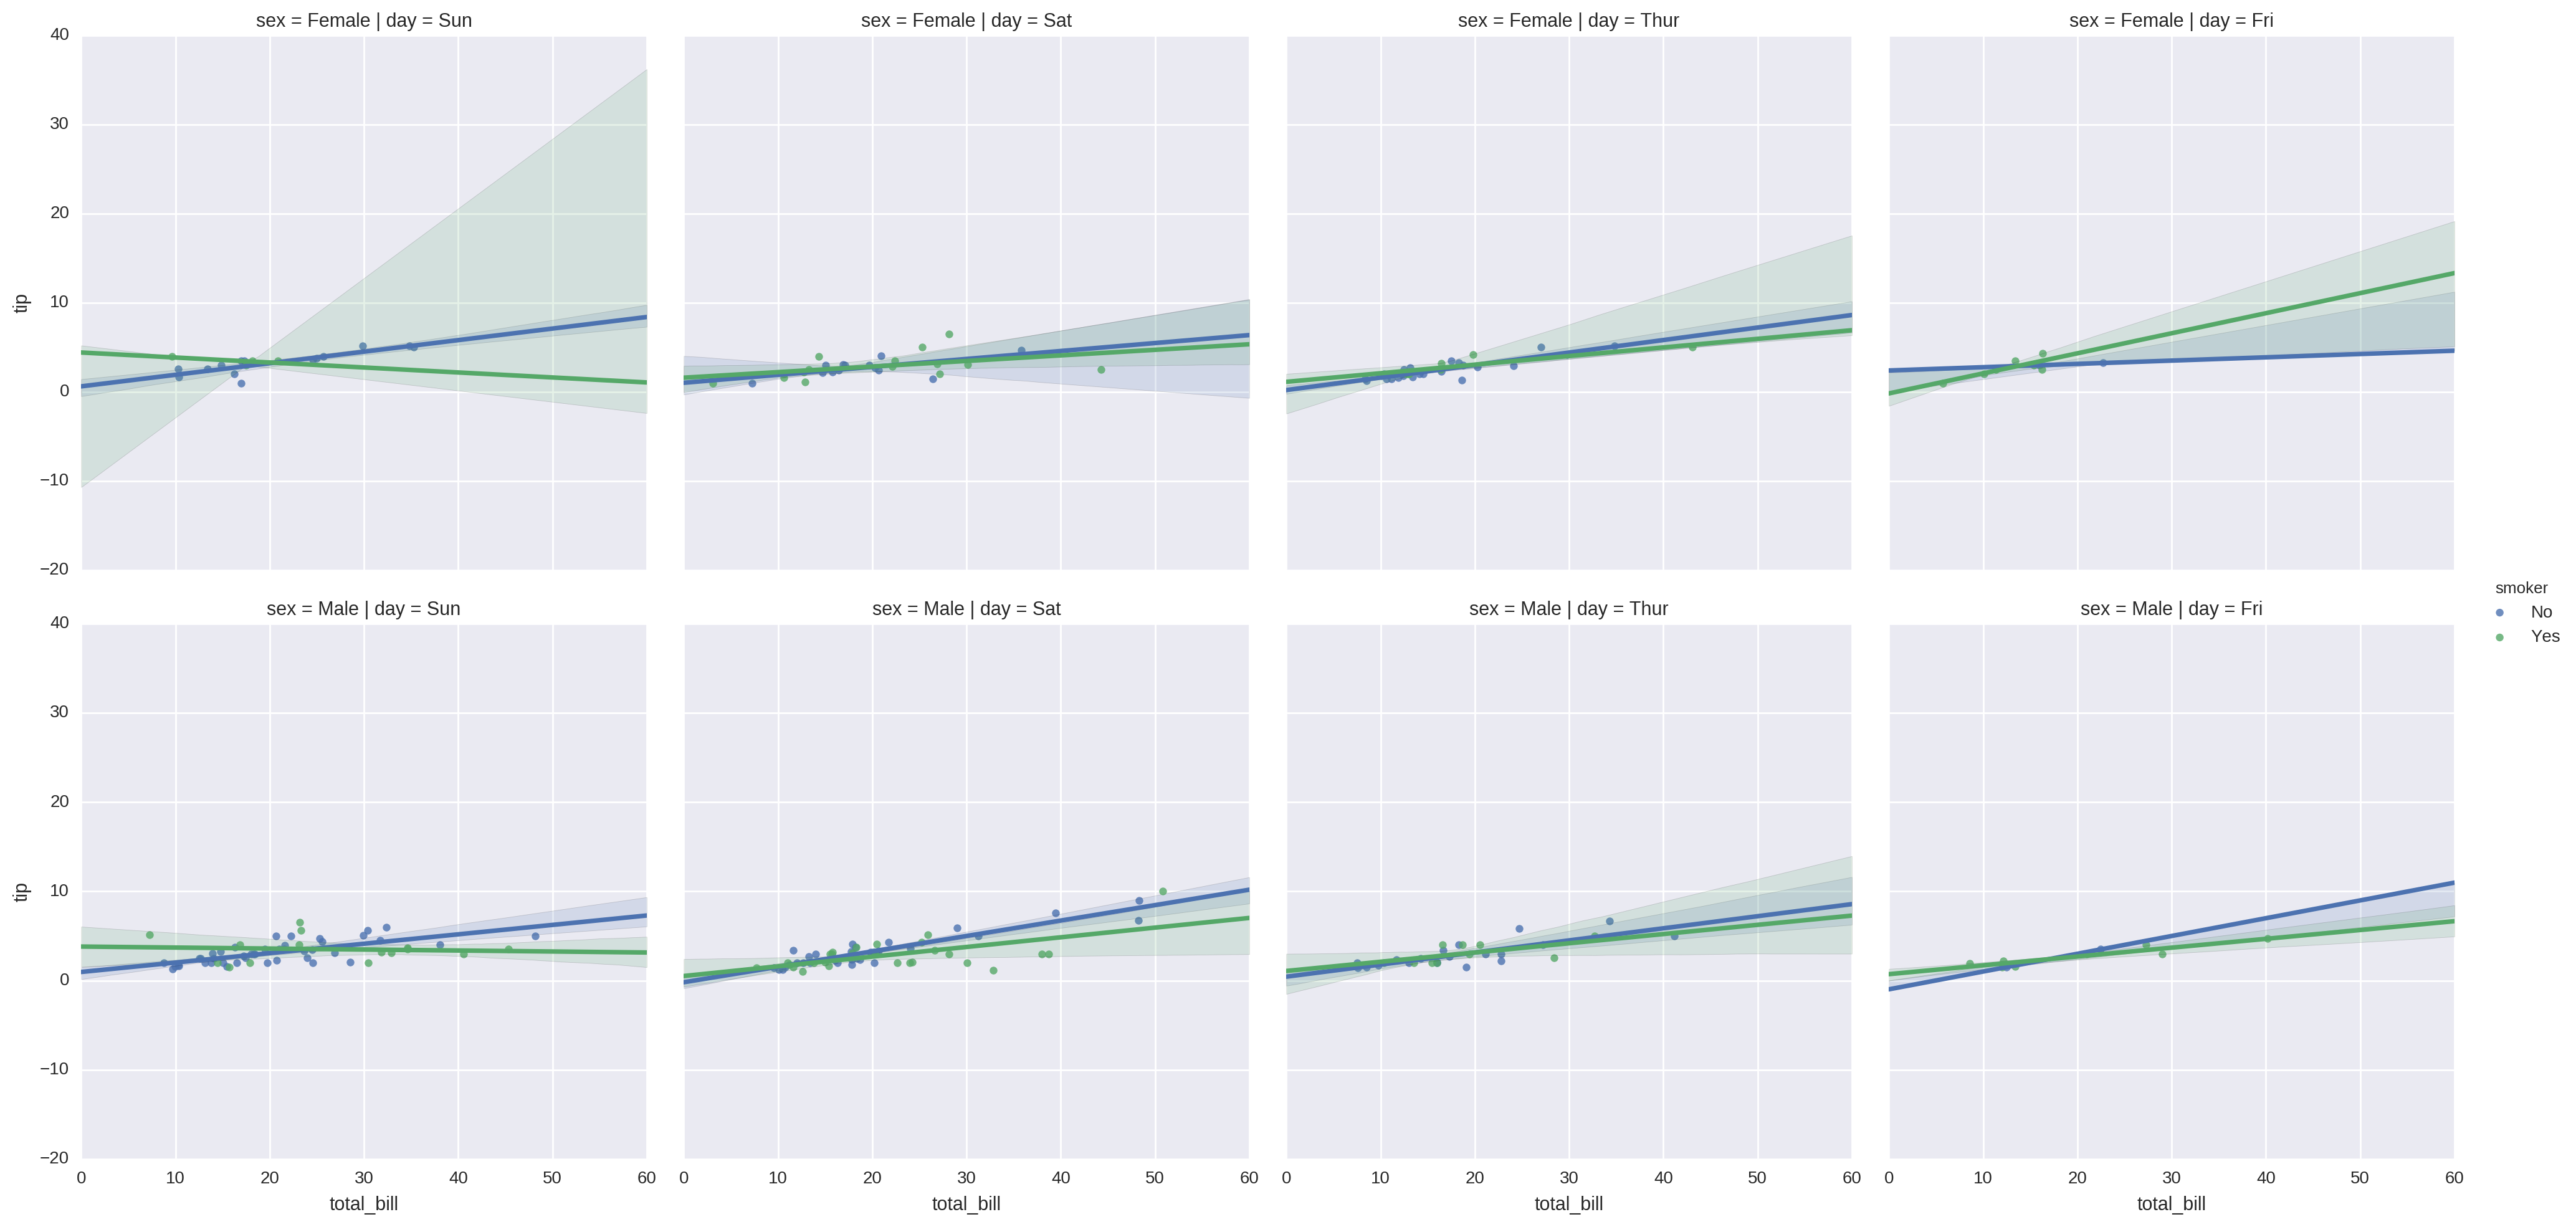

In [32]:
p = sns.lmplot('total_bill', 'tip', tips, hue='smoker', col='day', row='sex')

#### barplot

In [35]:
data = run10.groupby(['state', 'gender'], as_index=False)['time'].mean().sort_values('time', ascending=True)
data.head()

,state,gender,time
45,Kenya,M,46.423333
26,Ethiopia,M,47.830000
44,Kenya,F,54.030000
25,Ethiopia,F,54.475000
88,Poland,F,54.600000


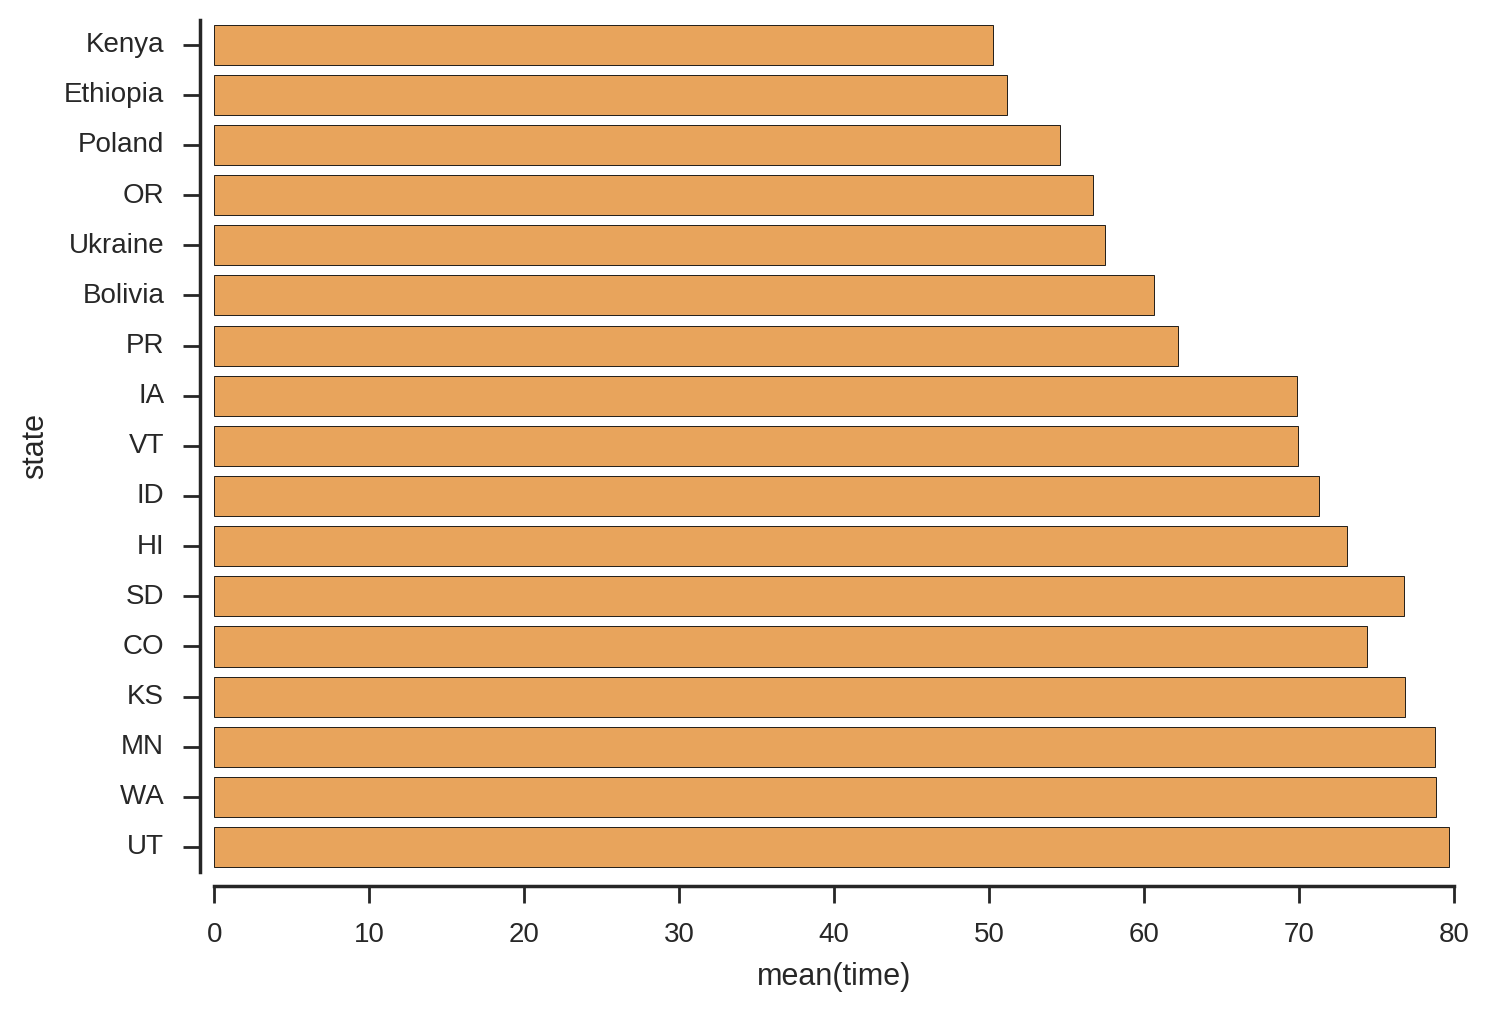

In [36]:
sns.set(style='ticks')
p = sns.barplot('time', 'state', data=data.head(20), ci=None, color='#FFA545')
sns.despine(offset=5)

#### boxplot

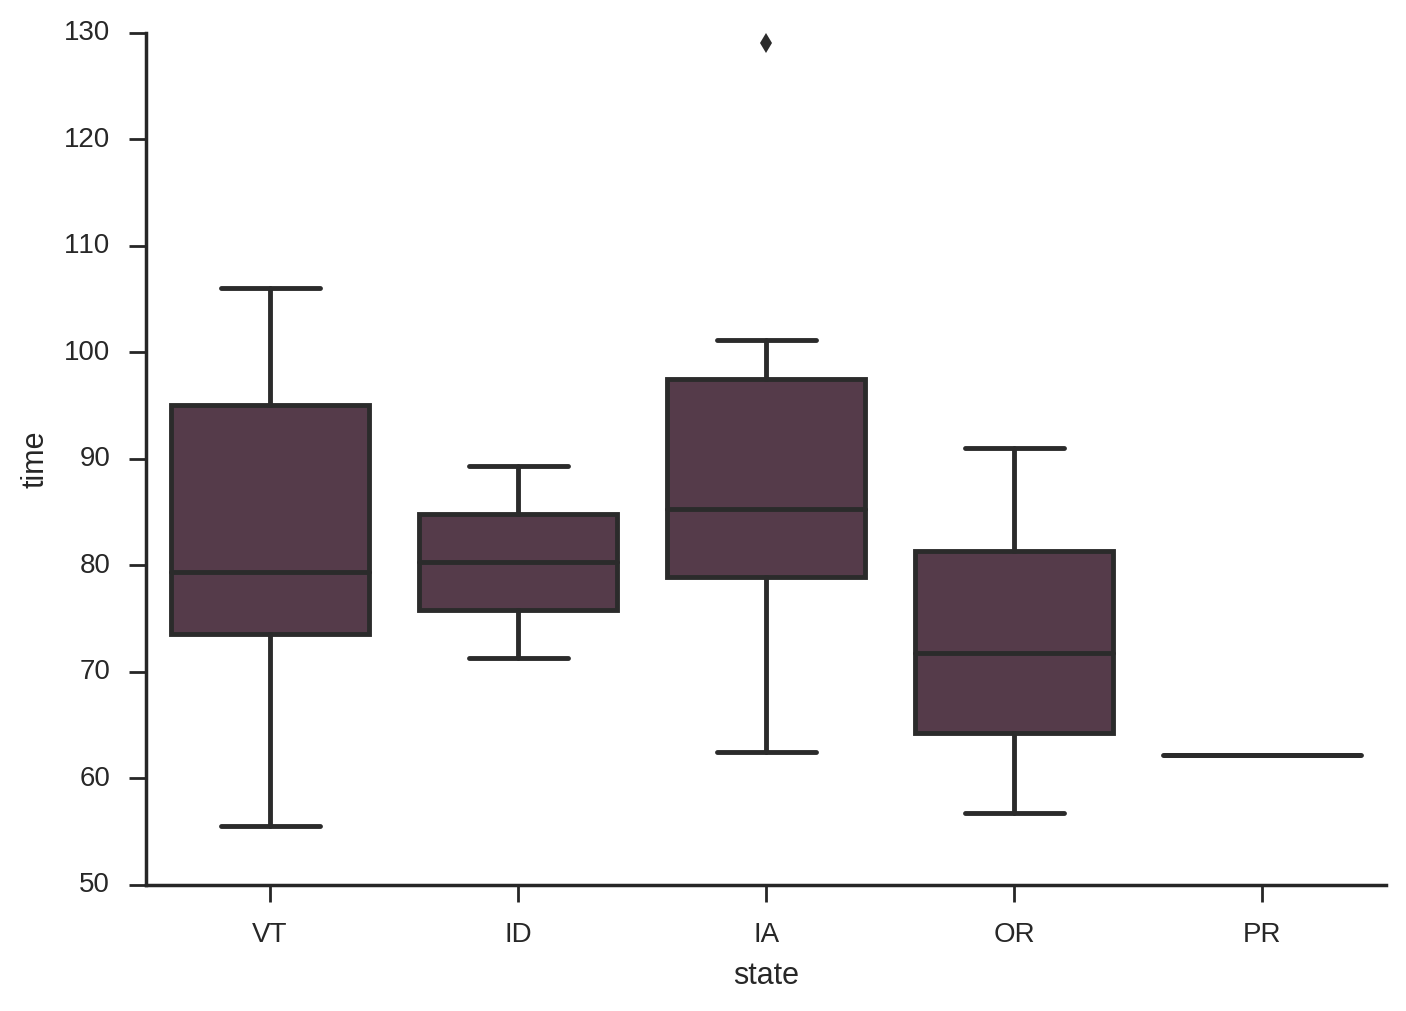

In [37]:
f = run10['state'].isin(['OR', 'PR', 'IA', 'VT', 'ID'])

sns.boxplot('state', 'time', data=run10[f], color='#59374A')
sns.despine()